# 📊 Análisis Exploratorio v2: Estructura Esquemática del Paper
## Efectividad de la RCP Transtelefónica en Paradas Cardiacas Extrahospitalarias

### Objetivos del Análisis:
1. **Análisis descriptivo** de la muestra (Tabla 1 del paper)
2. **Comparación de outcomes** por grupos de RCP
3. **Análisis específico**: Distribución de CPC según RCP transtelefónica vs RCP de testigos legos
4. **Tests estadísticos**: t-Student y Chi-cuadrado
5. **Preparación de figuras** para el paper científico

---

## 📚 1. Importación de Librerías y Datos

In [1]:
# Librerías para análisis de datos y estadística
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Configuración para guardar figuras
import os
figures_dir = '/Users/miguel/Desktop/RCP Transtelefonica/proyecto/figures'
os.makedirs(figures_dir, exist_ok=True)

print("✅ Librerías importadas correctamente")
print(f"📁 Directorio de figuras: {figures_dir}")

✅ Librerías importadas correctamente
📁 Directorio de figuras: /Users/miguel/Desktop/RCP Transtelefonica/proyecto/figures


In [2]:
# Cargar datos limpios
data_path = '/Users/miguel/Desktop/RCP Transtelefonica/data/cleaned_data.csv'
df = pd.read_csv(data_path)

# Mostrar información básica del dataset
print("📊 INFORMACIÓN DEL DATASET")
print("="*50)
print(f"Total de casos: {len(df)}")
print(f"Variables: {len(df.columns)}")
print(f"\nColumnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Vista previa de los datos
print("\n📋 PRIMERAS 5 FILAS:")
print("="*50)
display(df.head())

# Información de tipos de datos y missing values
print("\n🔍 INFORMACIÓN DE VARIABLES:")
print("="*50)
info_df = pd.DataFrame({
    'Tipo': df.dtypes,
    'No Nulos': df.count(),
    'Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})
display(info_df)

📊 INFORMACIÓN DEL DATASET
Total de casos: 622
Variables: 14

Columnas disponibles:
 1. n_informe
 2. fecha
 3. edad
 4. sexo
 5. rcp_transtelefonica
 6. rcp_testigos
 7. respondiente_rcp
 8. desa_externo
 9. ritmo
10. tiempo_llegada_unidad
11. tiempo_rcp
12. rosc
13. supervivencia_7dias
14. cpc

📋 PRIMERAS 5 FILAS:


,n_informe,fecha,edad,sexo,rcp_transtelefonica,rcp_testigos,respondiente_rcp,desa_externo,ritmo,tiempo_llegada_unidad,tiempo_rcp,rosc,supervivencia_7dias,cpc
0,71090,29/06/2023 18:15,89.0,Masculino,0,0,NaN,0,0,806,1470,1,1,3
1,71934,01/07/2023 13:15,74.0,Masculino,0,0,NaN,0,0,309,180,0,0,5
2,73080,03/07/2023 14:07,58.0,Masculino,1,1,lego,0,1,442,1508,1,1,3
3,73309,04/07/2023 00:43,46.0,Masculino,0,0,NaN,0,0,319,0,0,0,5
4,73865,05/07/2023 13:18,45.0,Masculino,0,0,NaN,1,0,1331,4449,1,0,3



🔍 INFORMACIÓN DE VARIABLES:


,Tipo,No Nulos,Nulos,% Nulos
n_informe,int64,622,0,0.00
fecha,object,622,0,0.00
edad,float64,527,95,15.27
sexo,object,599,23,3.70
rcp_transtelefonica,int64,622,0,0.00
rcp_testigos,int64,622,0,0.00
respondiente_rcp,object,208,414,66.56
desa_externo,int64,622,0,0.00
ritmo,int64,622,0,0.00
tiempo_llegada_unidad,int64,622,0,0.00


In [3]:
# VERIFICACIÓN DE PROBLEMAS EN LOS DATOS
print("\n🔍 VERIFICACIÓN DE CALIDAD DE DATOS")
print("="*60)

# Primero verificar las columnas disponibles
print("Columnas disponibles en el dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Mapear nombres de columnas
col_mapping = {}
for col in df.columns:
    col_lower = col.lower().strip()
    if 'sex' in col_lower:
        col_mapping['sexo'] = col
    elif 'rcp_transtelefonica' in col_lower:
        col_mapping['rcp_transtelefonica'] = col
    elif 'rcp_testigos' in col_lower:
        col_mapping['rcp_testigos'] = col
    elif 'respondiente' in col_lower or 'responder' in col_lower:
        col_mapping['respondiente_rcp'] = col

print(f"\nMapeo de columnas identificadas:")
for key, value in col_mapping.items():
    print(f"  {key} -> {value}")

# 1. Verificar distribución de sexo
if 'sexo' in col_mapping:
    print(f"\n1️⃣ DISTRIBUCIÓN POR SEXO:")
    sexo_col = col_mapping['sexo']
    sexo_counts = df[sexo_col].value_counts()
    sexo_pct = df[sexo_col].value_counts(normalize=True) * 100
    for sexo, count in sexo_counts.items():
        pct = sexo_pct[sexo]
        print(f"   • {sexo}: {count} casos ({pct:.1f}%)")
    
    # Verificar si hay problemas con la distribución del sexo
    masculino_pct = 0
    for sexo in sexo_counts.index:
        if 'masc' in str(sexo).lower() or 'male' in str(sexo).lower() or 'h' == str(sexo).lower() or 'm' == str(sexo).lower():
            masculino_pct += sexo_pct[sexo]
    
    if masculino_pct < 60:
        print(f"   ⚠️ POSIBLE PROBLEMA: Solo {masculino_pct:.1f}% son masculinos (esperado ~70%)")
    else:
        print(f"   ✅ Distribución de sexo parece correcta: {masculino_pct:.1f}% masculinos")

# 2. Verificar relación RCP transtelefónica vs RCP testigos
if 'rcp_transtelefonica' in col_mapping and 'rcp_testigos' in col_mapping:
    print(f"\n2️⃣ RELACIÓN RCP TRANSTELEFÓNICA vs RCP TESTIGOS:")
    rcp_trans_col = col_mapping['rcp_transtelefonica']
    rcp_test_col = col_mapping['rcp_testigos']
    
    tabla_rcp_relacion = pd.crosstab(df[rcp_trans_col], df[rcp_test_col], margins=True)
    print("   Tabla de contingencia (filas=RCP Trans, columnas=RCP Testigos):")
    display(tabla_rcp_relacion)
    
    # Casos problemáticos: RCP transtelefónica SIN testigos
    casos_problema = df[(df[rcp_trans_col] == 1) & (df[rcp_test_col] == 0)]
    print(f"\n   ⚠️ CASOS PROBLEMÁTICOS (RCP Trans=1, RCP Testigos=0): {len(casos_problema)}")
    
    if len(casos_problema) > 0:
        print("   Estos casos son teóricamente imposibles (no puede haber RCP transtelefónica sin testigos)")
        print("   Primeros 5 casos problemáticos:")
        cols_to_show = ['n_informe', rcp_trans_col, rcp_test_col]
        if 'respondiente_rcp' in col_mapping:
            cols_to_show.append(col_mapping['respondiente_rcp'])
        display(casos_problema[cols_to_show].head())
    else:
        print("   ✅ No hay casos problemáticos")

# 3. Análisis de respondiente_rcp
if 'respondiente_rcp' in col_mapping:
    print(f"\n3️⃣ ANÁLISIS DE TIPO DE RESPONDIENTE:")
    resp_col = col_mapping['respondiente_rcp']
    respondiente_counts = df[resp_col].value_counts()
    print("   Distribución de respondientes:")
    for resp, count in respondiente_counts.items():
        pct = count / len(df) * 100
        print(f"   • '{resp}': {count} casos ({pct:.1f}%)")

# 4. Casos con RCP transtelefónica
if 'rcp_transtelefonica' in col_mapping:
    rcp_trans_col = col_mapping['rcp_transtelefonica']
    casos_rcp_trans = df[df[rcp_trans_col] == 1]
    print(f"\n4️⃣ CASOS CON RCP TRANSTELEFÓNICA:")
    print(f"   • Total: {len(casos_rcp_trans)} casos ({len(casos_rcp_trans)/len(df)*100:.1f}%)")
    
    if 'rcp_testigos' in col_mapping:
        rcp_test_col = col_mapping['rcp_testigos']
        print(f"   • Con testigos: {casos_rcp_trans[rcp_test_col].sum()}")
        print(f"   • Sin testigos: {len(casos_rcp_trans) - casos_rcp_trans[rcp_test_col].sum()}")

print(f"\n📋 RECOMENDACIONES PARA CORRECCIÓN:")
if 'rcp_transtelefonica' in col_mapping and 'rcp_testigos' in col_mapping:
    casos_problema = df[(df[col_mapping['rcp_transtelefonica']] == 1) & (df[col_mapping['rcp_testigos']] == 0)]
    if len(casos_problema) > 0:
        print(f"   1. ❌ ELIMINAR análisis de RCP transtelefónica vs RCP testigos (lógicamente inconsistente)")
        print(f"   2. Los {len(casos_problema)} casos con RCP Trans=1 y Testigos=0 necesitan revisión")
        
print(f"   3. ✅ ENFOCAR análisis en: RCP transtelefónica vs outcomes (ROSC, supervivencia, CPC)")
print(f"   4. ✅ ANALIZAR tiempo de llegada como variable de confusión")
print(f"   5. ✅ ESTRATIFICAR por edad, sexo, ritmo inicial como variables importantes")


🔍 VERIFICACIÓN DE CALIDAD DE DATOS
Columnas disponibles en el dataset:
 1. n_informe
 2. fecha
 3. edad
 4. sexo
 5. rcp_transtelefonica
 6. rcp_testigos
 7. respondiente_rcp
 8. desa_externo
 9. ritmo
10. tiempo_llegada_unidad
11. tiempo_rcp
12. rosc
13. supervivencia_7dias
14. cpc

Mapeo de columnas identificadas:
  sexo -> sexo
  rcp_transtelefonica -> rcp_transtelefonica
  rcp_testigos -> rcp_testigos
  respondiente_rcp -> respondiente_rcp

1️⃣ DISTRIBUCIÓN POR SEXO:
   • Masculino: 463 casos (77.3%)
   • Femenino: 136 casos (22.7%)
   ✅ Distribución de sexo parece correcta: 77.3% masculinos

2️⃣ RELACIÓN RCP TRANSTELEFÓNICA vs RCP TESTIGOS:
   Tabla de contingencia (filas=RCP Trans, columnas=RCP Testigos):


rcp_testigos,0,1,All
rcp_transtelefonica,,,
0,414,146,560
1,0,62,62
All,414,208,622



   ⚠️ CASOS PROBLEMÁTICOS (RCP Trans=1, RCP Testigos=0): 0
   ✅ No hay casos problemáticos

3️⃣ ANÁLISIS DE TIPO DE RESPONDIENTE:
   Distribución de respondientes:
   • 'lego': 122 casos (19.6%)
   • 'sanitario': 74 casos (11.9%)
   • 'policia': 10 casos (1.6%)
   • 'bombero': 2 casos (0.3%)

4️⃣ CASOS CON RCP TRANSTELEFÓNICA:
   • Total: 62 casos (10.0%)
   • Con testigos: 62
   • Sin testigos: 0

📋 RECOMENDACIONES PARA CORRECCIÓN:
   3. ✅ ENFOCAR análisis en: RCP transtelefónica vs outcomes (ROSC, supervivencia, CPC)
   4. ✅ ANALIZAR tiempo de llegada como variable de confusión
   5. ✅ ESTRATIFICAR por edad, sexo, ritmo inicial como variables importantes


## 📊 2. Análisis de Distribución de los Datos

### Estadística descriptiva y distribución de variables principales

In [4]:
# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Análisis detallado de la distribución de datos
print("📊 ANÁLISIS DE DISTRIBUCIÓN DE DATOS")
print("="*60)

# 1. Estadística descriptiva general
print("\n1️⃣ ESTADÍSTICA DESCRIPTIVA GENERAL")
print("-"*40)
print(f"Total de casos: {len(df)}")
print(f"Periodo de estudio: Variable temporal no especificada")
print(f"Variables analizadas: {len(df.columns)}")

# Variables categóricas
variables_categoricas = ['sexo', 'rcp_transtelefonica', 'rcp_testigos', 'ritmo', 'desa_externo', 'rosc', 'supervivencia_7dias']
print(f"\nVariables categóricas: {len(variables_categoricas)}")
for var in variables_categoricas:
    if var in df.columns:
        print(f"  • {var}: {df[var].nunique()} categorías")

# Variables numéricas
variables_numericas = ['edad', 'tiempo_llegada_unidad', 'cpc']
print(f"\nVariables numéricas: {len(variables_numericas)}")
for var in variables_numericas:
    if var in df.columns:
        print(f"  • {var}: Rango [{df[var].min():.1f} - {df[var].max():.1f}]")

# 2. Distribución de variable principal: RCP Transtelefónica
print(f"\n\n2️⃣ DISTRIBUCIÓN DE RCP TRANSTELEFÓNICA")
print("-"*40)
rcp_dist = df['rcp_transtelefonica'].value_counts().sort_index()
rcp_pct = df['rcp_transtelefonica'].value_counts(normalize=True).sort_index() * 100

tabla_rcp_dist = pd.DataFrame({
    'Grupo': ['Sin RCP Transtelefónica', 'Con RCP Transtelefónica'],
    'n': [rcp_dist[0], rcp_dist[1]],
    'Porcentaje (%)': [rcp_pct[0], rcp_pct[1]]
})
display(tabla_rcp_dist)

# 3. Distribución por sexo
print(f"\n3️⃣ DISTRIBUCIÓN POR SEXO")
print("-"*40)
sexo_dist = df['sexo'].value_counts()
sexo_pct = df['sexo'].value_counts(normalize=True) * 100

tabla_sexo_dist = pd.DataFrame({
    'Sexo': sexo_dist.index,
    'n': sexo_dist.values,
    'Porcentaje (%)': sexo_pct.values
})
display(tabla_sexo_dist)

# 4. Distribución de outcomes principales
print(f"\n4️⃣ DISTRIBUCIÓN DE OUTCOMES PRINCIPALES")
print("-"*40)
# ROSC
rosc_dist = df['rosc'].value_counts().sort_index()
rosc_pct = df['rosc'].value_counts(normalize=True).sort_index() * 100

print("ROSC (Retorno de Circulación Espontánea):")
tabla_rosc_dist = pd.DataFrame({
    'ROSC': ['No', 'Sí'],
    'n': [rosc_dist[0], rosc_dist[1]],
    'Porcentaje (%)': [rosc_pct[0], rosc_pct[1]]
})
display(tabla_rosc_dist)

# Supervivencia 7 días
superv_dist = df['supervivencia_7dias'].value_counts().sort_index()
superv_pct = df['supervivencia_7dias'].value_counts(normalize=True).sort_index() * 100

print("\nSupervivencia a 7 días:")
tabla_superv_dist = pd.DataFrame({
    'Supervivencia': ['No', 'Sí'],
    'n': [superv_dist[0], superv_dist[1]],
    'Porcentaje (%)': [superv_pct[0], superv_pct[1]]
})
display(tabla_superv_dist)

# 5. Distribución de CPC
print(f"\n5️⃣ DISTRIBUCIÓN DE CPC (CEREBRAL PERFORMANCE CATEGORY)")
print("-"*40)
cpc_dist = df['cpc'].value_counts().sort_index()
cpc_pct = df['cpc'].value_counts(normalize=True).sort_index() * 100

tabla_cpc_dist = pd.DataFrame({
    'CPC': [f'CPC {cpc}' for cpc in cpc_dist.index],
    'n': cpc_dist.values,
    'Porcentaje (%)': cpc_pct.values
})
display(tabla_cpc_dist)

print(f"\nCPC interpretación:")
print(f"• CPC 1-2: Buen resultado neurológico")
print(f"• CPC 3-4: Resultado neurológico pobre")
print(f"• CPC 5: Muerte cerebral/Estado vegetativo")

# Calcular buenos vs malos resultados neurológicos
cpc_bueno = df['cpc'].isin([1, 2]).sum()
cpc_malo = df['cpc'].isin([3, 4, 5]).sum()
print(f"\nResultados agrupados:")
print(f"• Buen resultado neurológico (CPC 1-2): {cpc_bueno} ({cpc_bueno/len(df)*100:.1f}%)")
print(f"• Mal resultado neurológico (CPC 3-5): {cpc_malo} ({cpc_malo/len(df)*100:.1f}%)")

📊 ANÁLISIS DE DISTRIBUCIÓN DE DATOS

1️⃣ ESTADÍSTICA DESCRIPTIVA GENERAL
----------------------------------------
Total de casos: 622
Periodo de estudio: Variable temporal no especificada
Variables analizadas: 14

Variables categóricas: 7
  • sexo: 2 categorías
  • rcp_transtelefonica: 2 categorías
  • rcp_testigos: 2 categorías
  • ritmo: 2 categorías
  • desa_externo: 2 categorías
  • rosc: 2 categorías
  • supervivencia_7dias: 2 categorías

Variables numéricas: 3
  • edad: Rango [0.0 - 97.0]
  • tiempo_llegada_unidad: Rango [8.0 - 4245.0]
  • cpc: Rango [1.0 - 5.0]


2️⃣ DISTRIBUCIÓN DE RCP TRANSTELEFÓNICA
----------------------------------------


,Grupo,n,Porcentaje (%)
0,Sin RCP Transtelefónica,560,90.032154
1,Con RCP Transtelefónica,62,9.967846



3️⃣ DISTRIBUCIÓN POR SEXO
----------------------------------------


,Sexo,n,Porcentaje (%)
0,Masculino,463,77.295492
1,Femenino,136,22.704508



4️⃣ DISTRIBUCIÓN DE OUTCOMES PRINCIPALES
----------------------------------------
ROSC (Retorno de Circulación Espontánea):


,ROSC,n,Porcentaje (%)
0,No,386,62.057878
1,Sí,236,37.942122



Supervivencia a 7 días:


,Supervivencia,n,Porcentaje (%)
0,No,496,79.742765
1,Sí,126,20.257235



5️⃣ DISTRIBUCIÓN DE CPC (CEREBRAL PERFORMANCE CATEGORY)
----------------------------------------


,CPC,n,Porcentaje (%)
0,CPC 1,53,8.520900
1,CPC 3,175,28.135048
2,CPC 4,8,1.286174
3,CPC 5,386,62.057878



CPC interpretación:
• CPC 1-2: Buen resultado neurológico
• CPC 3-4: Resultado neurológico pobre
• CPC 5: Muerte cerebral/Estado vegetativo

Resultados agrupados:
• Buen resultado neurológico (CPC 1-2): 53 (8.5%)
• Mal resultado neurológico (CPC 3-5): 569 (91.5%)



📊 GENERANDO HISTOGRAMAS DE DISTRIBUCIÓN


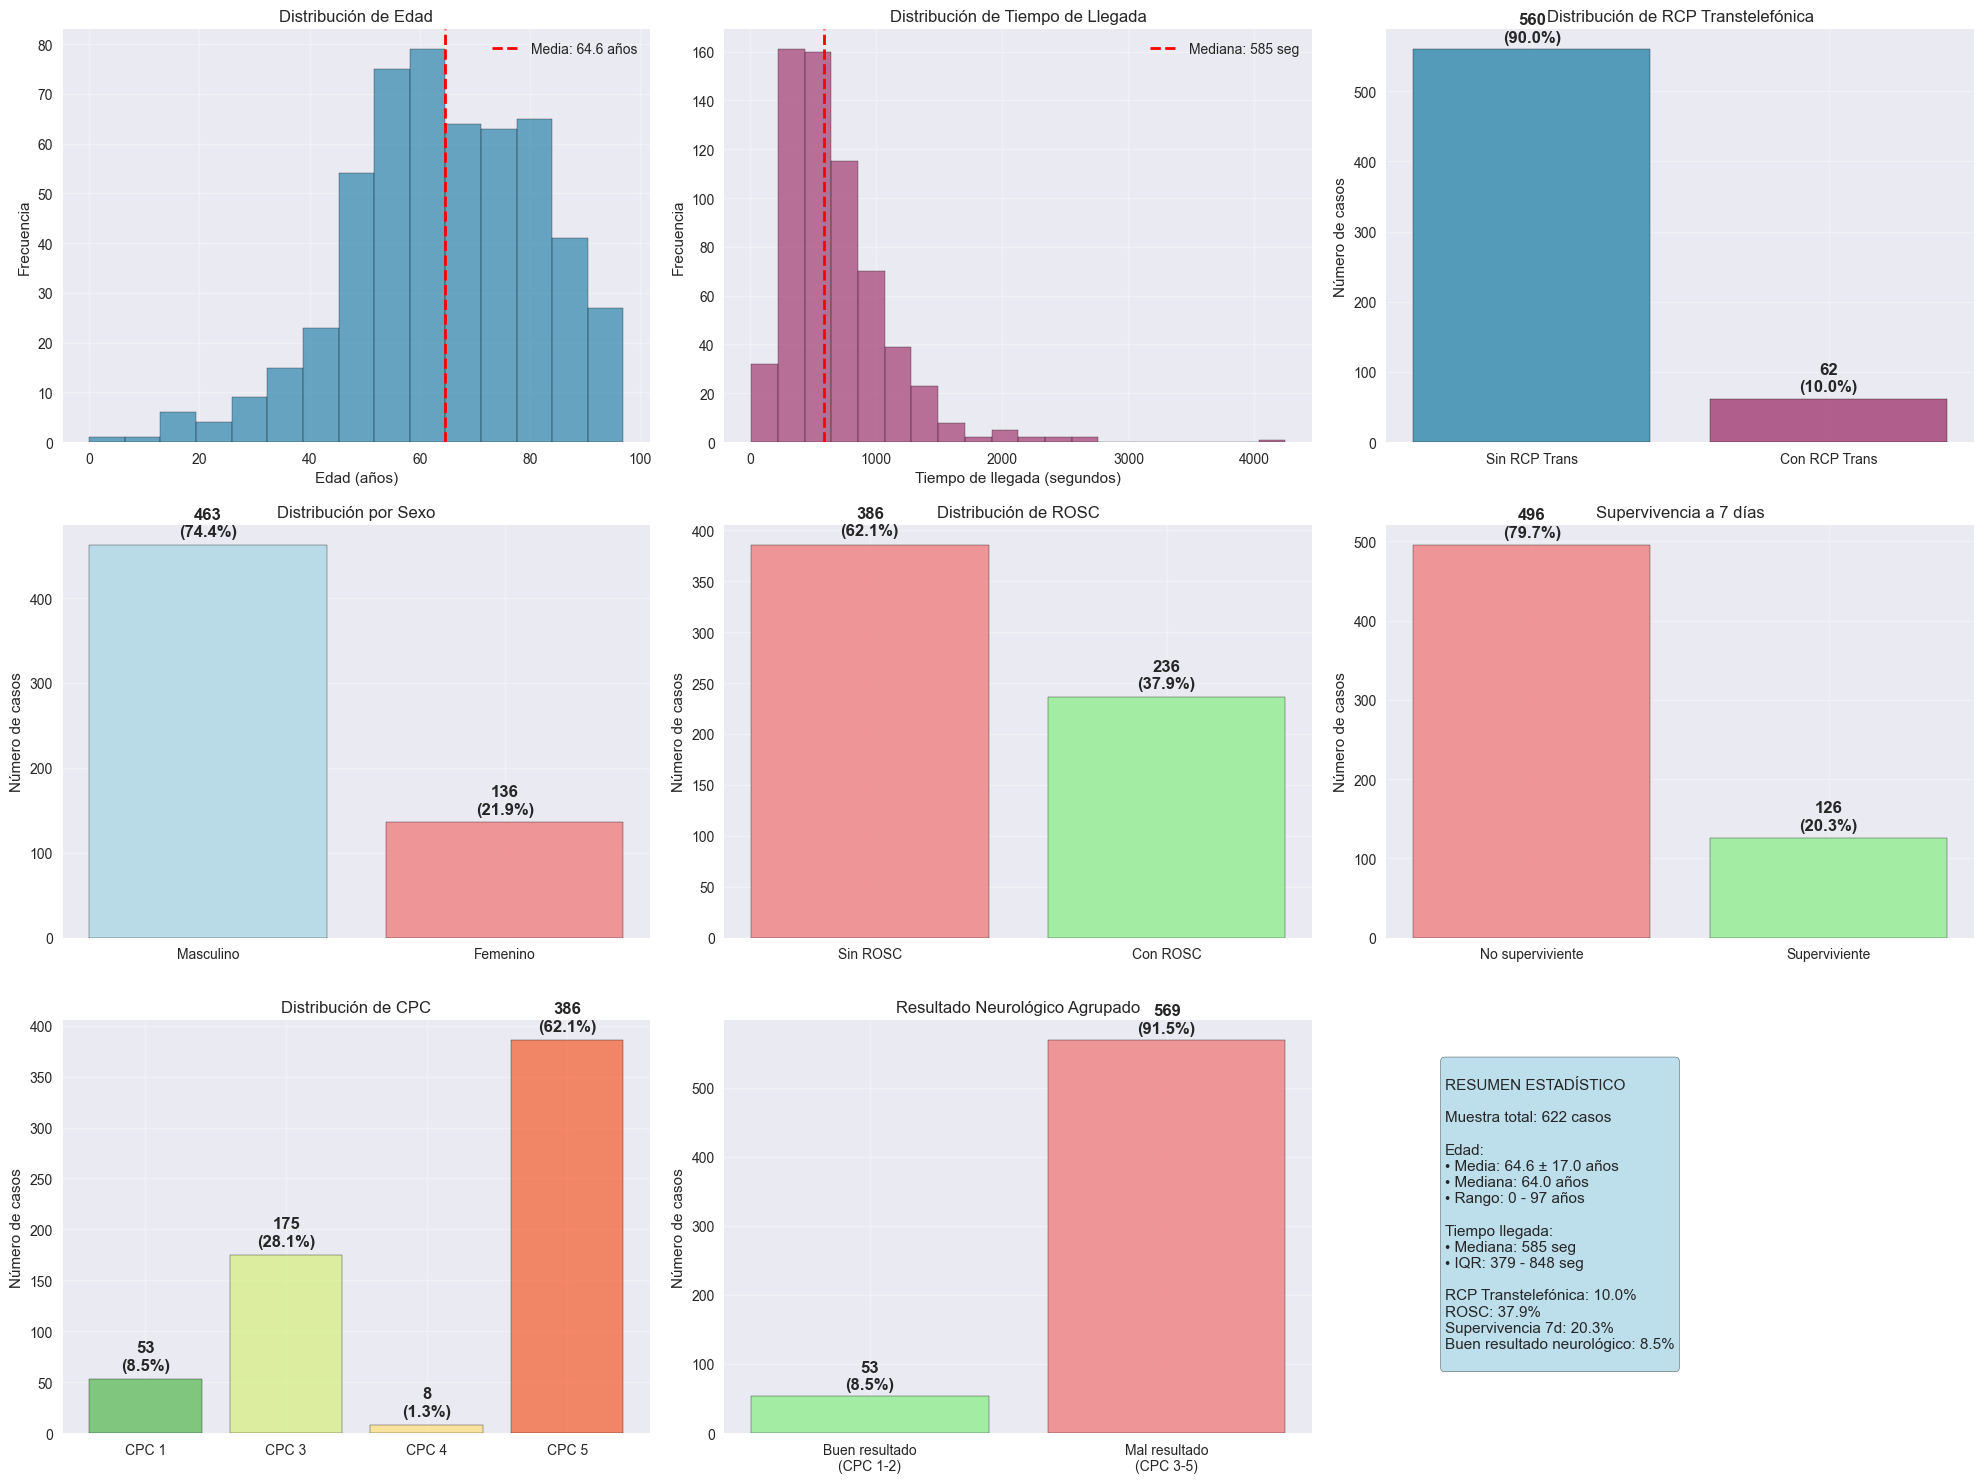

✅ Histogramas guardados: histogramas_distribucion_completa.png


In [5]:
# Generar histogramas de distribución
print("\n📊 GENERANDO HISTOGRAMAS DE DISTRIBUCIÓN")
print("="*50)

# Configuración de la figura con múltiples subplots
fig = plt.figure(figsize=(20, 15))

# Colores personalizados
color_principal = '#2E86AB'
color_secundario = '#A23B72'

# 1. Histograma de Edad
ax1 = plt.subplot(3, 3, 1)
edad_data = df['edad'].dropna()
n_bins = 15
hist, bins, patches = ax1.hist(edad_data, bins=n_bins, color=color_principal, alpha=0.7, edgecolor='black')

# Añadir línea de media
media_edad = edad_data.mean()
ax1.axvline(media_edad, color='red', linestyle='--', linewidth=2, label=f'Media: {media_edad:.1f} años')
ax1.set_xlabel('Edad (años)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Edad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Histograma de Tiempo de Llegada
ax2 = plt.subplot(3, 3, 2)
tiempo_data = df['tiempo_llegada_unidad'].dropna()
hist2, bins2, patches2 = ax2.hist(tiempo_data, bins=20, color=color_secundario, alpha=0.7, edgecolor='black')

# Añadir línea de mediana (más apropiada para datos sesgados)
mediana_tiempo = tiempo_data.median()
ax2.axvline(mediana_tiempo, color='red', linestyle='--', linewidth=2, label=f'Mediana: {mediana_tiempo:.0f} seg')
ax2.set_xlabel('Tiempo de llegada (segundos)')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de Tiempo de Llegada')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Gráfico de barras: RCP Transtelefónica
ax3 = plt.subplot(3, 3, 3)
rcp_counts = df['rcp_transtelefonica'].value_counts().sort_index()
labels_rcp = ['Sin RCP Trans', 'Con RCP Trans']
bars3 = ax3.bar(labels_rcp, rcp_counts.values, color=[color_principal, color_secundario], alpha=0.8, edgecolor='black')

# Añadir porcentajes en las barras
for i, (bar, count) in enumerate(zip(bars3, rcp_counts.values)):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax3.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.01,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

ax3.set_ylabel('Número de casos')
ax3.set_title('Distribución de RCP Transtelefónica')
ax3.grid(True, alpha=0.3)

# 4. Gráfico de barras: Sexo
ax4 = plt.subplot(3, 3, 4)
sexo_counts = df['sexo'].value_counts()
bars4 = ax4.bar(sexo_counts.index, sexo_counts.values, color=['lightblue', 'lightcoral'], alpha=0.8, edgecolor='black')

for i, (bar, count) in enumerate(zip(bars4, sexo_counts.values)):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax4.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.01,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

ax4.set_ylabel('Número de casos')
ax4.set_title('Distribución por Sexo')
ax4.grid(True, alpha=0.3)

# 5. Gráfico de barras: ROSC
ax5 = plt.subplot(3, 3, 5)
rosc_counts = df['rosc'].value_counts().sort_index()
labels_rosc = ['Sin ROSC', 'Con ROSC']
bars5 = ax5.bar(labels_rosc, rosc_counts.values, color=['lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')

for i, (bar, count) in enumerate(zip(bars5, rosc_counts.values)):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax5.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.01,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

ax5.set_ylabel('Número de casos')
ax5.set_title('Distribución de ROSC')
ax5.grid(True, alpha=0.3)

# 6. Gráfico de barras: Supervivencia 7 días
ax6 = plt.subplot(3, 3, 6)
superv_counts = df['supervivencia_7dias'].value_counts().sort_index()
labels_superv = ['No superviviente', 'Superviviente']
bars6 = ax6.bar(labels_superv, superv_counts.values, color=['lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')

for i, (bar, count) in enumerate(zip(bars6, superv_counts.values)):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax6.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.01,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

ax6.set_ylabel('Número de casos')
ax6.set_title('Supervivencia a 7 días')
ax6.grid(True, alpha=0.3)

# 7. Gráfico de barras: CPC
ax7 = plt.subplot(3, 3, 7)
cpc_counts = df['cpc'].value_counts().sort_index()
colors_cpc = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(cpc_counts)))
bars7 = ax7.bar([f'CPC {cpc}' for cpc in cpc_counts.index], cpc_counts.values, 
                color=colors_cpc, alpha=0.8, edgecolor='black')

for i, (bar, count) in enumerate(zip(bars7, cpc_counts.values)):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax7.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.01,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

ax7.set_ylabel('Número de casos')
ax7.set_title('Distribución de CPC')
ax7.grid(True, alpha=0.3)

# 8. Histograma de CPC agrupado (bueno vs malo)
ax8 = plt.subplot(3, 3, 8)
cpc_bueno = df['cpc'].isin([1, 2]).sum()
cpc_malo = df['cpc'].isin([3, 4, 5]).sum()
bars8 = ax8.bar(['Buen resultado\n(CPC 1-2)', 'Mal resultado\n(CPC 3-5)'], 
                [cpc_bueno, cpc_malo], color=['lightgreen', 'lightcoral'], alpha=0.8, edgecolor='black')

for i, (bar, count) in enumerate(zip(bars8, [cpc_bueno, cpc_malo])):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax8.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.01,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

ax8.set_ylabel('Número de casos')
ax8.set_title('Resultado Neurológico Agrupado')
ax8.grid(True, alpha=0.3)

# 9. Estadísticas descriptivas en texto
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
stats_text = f"""
RESUMEN ESTADÍSTICO

Muestra total: {len(df)} casos

Edad:
• Media: {df['edad'].mean():.1f} ± {df['edad'].std():.1f} años
• Mediana: {df['edad'].median():.1f} años
• Rango: {df['edad'].min():.0f} - {df['edad'].max():.0f} años

Tiempo llegada:
• Mediana: {df['tiempo_llegada_unidad'].median():.0f} seg
• IQR: {df['tiempo_llegada_unidad'].quantile(0.25):.0f} - {df['tiempo_llegada_unidad'].quantile(0.75):.0f} seg

RCP Transtelefónica: {df['rcp_transtelefonica'].mean()*100:.1f}%
ROSC: {df['rosc'].mean()*100:.1f}%
Supervivencia 7d: {df['supervivencia_7dias'].mean()*100:.1f}%
Buen resultado neurológico: {(df['cpc'].isin([1,2]).sum()/len(df)*100):.1f}%
"""
ax9.text(0.1, 0.9, stats_text, transform=ax9.transAxes, fontsize=11, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig(f'{figures_dir}/histogramas_distribucion_completa.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Histogramas guardados: histogramas_distribucion_completa.png")

## 🔬 3. Test Chi-Cuadrado y Odds Ratios (OR)

### Análisis estadístico de asociaciones y cálculo de OR con intervalos de confianza

In [6]:
# Función para calcular OR con IC 95%
def calcular_or_ic95(tabla_contingencia):
    """
    Calcula OR e intervalos de confianza del 95% a partir de tabla 2x2
    
    Tabla 2x2:
           Outcome+  Outcome-
    Exp+      a        b
    Exp-      c        d
    
    OR = (a*d)/(b*c)
    """
    a = tabla_contingencia.iloc[1, 1]  # Outcome+ y Exposición+
    b = tabla_contingencia.iloc[0, 1]  # Outcome- y Exposición+
    c = tabla_contingencia.iloc[1, 0]  # Outcome+ y Exposición-
    d = tabla_contingencia.iloc[0, 0]  # Outcome- y Exposición-
    
    # Calcular OR
    or_value = (a * d) / (b * c) if (b * c) != 0 else np.inf
    
    # Error estándar del log(OR)
    se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d) if all(x > 0 for x in [a, b, c, d]) else np.inf
    
    # IC 95%
    log_or = np.log(or_value)
    ci_lower = np.exp(log_or - 1.96 * se_log_or)
    ci_upper = np.exp(log_or + 1.96 * se_log_or)
    
    return or_value, ci_lower, ci_upper, (a, b, c, d)

print("🔬 ANÁLISIS CHI-CUADRADO Y ODDS RATIOS")
print("="*70)

# ═══════════════════════════════════════════════════════════
# 1. ANÁLISIS PRINCIPAL: RCP TRANSTELEFÓNICA vs ROSC
# ═══════════════════════════════════════════════════════════
print(f"\n1️⃣ RCP TRANSTELEFÓNICA vs ROSC")
print("="*50)

# Crear tabla de contingencia
tabla_rosc_rcp = pd.crosstab(df['rosc'], df['rcp_transtelefonica'], margins=True)
print("Tabla de contingencia ROSC vs RCP Transtelefónica:")
tabla_rosc_rcp_display = tabla_rosc_rcp.copy()
tabla_rosc_rcp_display.index = ['Sin ROSC', 'Con ROSC', 'Total']
tabla_rosc_rcp_display.columns = ['Sin RCP Trans', 'Con RCP Trans', 'Total']
display(tabla_rosc_rcp_display)

# Test Chi-cuadrado
tabla_para_chi2 = tabla_rosc_rcp.iloc[:-1, :-1]  # Excluir totales
chi2_rosc, p_chi2_rosc, dof_rosc, expected_rosc = chi2_contingency(tabla_para_chi2)

# Calcular OR e IC95%
or_rosc, ci_lower_rosc, ci_upper_rosc, celdas_rosc = calcular_or_ic95(tabla_para_chi2)

print(f"\n📊 RESULTADOS ESTADÍSTICOS:")
print(f"• Chi-cuadrado: χ² = {chi2_rosc:.3f}")
print(f"• Grados de libertad: {dof_rosc}")
print(f"• Valor p: {p_chi2_rosc:.4f}")
print(f"• Significativo: {'SÍ' if p_chi2_rosc < 0.05 else 'NO'} (α = 0.05)")

print(f"\n📈 ODDS RATIO:")
print(f"• OR = {or_rosc:.3f}")
print(f"• IC 95%: [{ci_lower_rosc:.3f} - {ci_upper_rosc:.3f}]")
print(f"• Interpretación: La RCP transtelefónica {'AUMENTA' if or_rosc > 1 else 'DISMINUYE'} las probabilidades de ROSC")
print(f"  en un factor de {or_rosc:.2f} veces respecto a no recibirla")

# Mostrar porcentajes
pct_rosc_con_rcp = tabla_para_chi2.iloc[1, 1] / tabla_para_chi2.iloc[:, 1].sum() * 100
pct_rosc_sin_rcp = tabla_para_chi2.iloc[1, 0] / tabla_para_chi2.iloc[:, 0].sum() * 100
print(f"\n📋 PORCENTAJES:")
print(f"• ROSC con RCP Transtelefónica: {tabla_para_chi2.iloc[1, 1]}/{tabla_para_chi2.iloc[:, 1].sum()} ({pct_rosc_con_rcp:.1f}%)")
print(f"• ROSC sin RCP Transtelefónica: {tabla_para_chi2.iloc[1, 0]}/{tabla_para_chi2.iloc[:, 0].sum()} ({pct_rosc_sin_rcp:.1f}%)")
print(f"• Diferencia: {pct_rosc_con_rcp - pct_rosc_sin_rcp:+.1f} puntos porcentuales")

# ═══════════════════════════════════════════════════════════
# 2. ANÁLISIS SECUNDARIO: RCP TRANSTELEFÓNICA vs SUPERVIVENCIA
# ═══════════════════════════════════════════════════════════
print(f"\n\n2️⃣ RCP TRANSTELEFÓNICA vs SUPERVIVENCIA 7 DÍAS")
print("="*50)

# Crear tabla de contingencia
tabla_superv_rcp = pd.crosstab(df['supervivencia_7dias'], df['rcp_transtelefonica'], margins=True)
print("Tabla de contingencia Supervivencia vs RCP Transtelefónica:")
tabla_superv_rcp_display = tabla_superv_rcp.copy()
tabla_superv_rcp_display.index = ['No superviviente', 'Superviviente', 'Total']
tabla_superv_rcp_display.columns = ['Sin RCP Trans', 'Con RCP Trans', 'Total']
display(tabla_superv_rcp_display)

# Test Chi-cuadrado
tabla_para_chi2_superv = tabla_superv_rcp.iloc[:-1, :-1]  # Excluir totales
chi2_superv, p_chi2_superv, dof_superv, expected_superv = chi2_contingency(tabla_para_chi2_superv)

# Calcular OR e IC95%
or_superv, ci_lower_superv, ci_upper_superv, celdas_superv = calcular_or_ic95(tabla_para_chi2_superv)

print(f"\n📊 RESULTADOS ESTADÍSTICOS:")
print(f"• Chi-cuadrado: χ² = {chi2_superv:.3f}")
print(f"• Grados de libertad: {dof_superv}")
print(f"• Valor p: {p_chi2_superv:.4f}")
print(f"• Significativo: {'SÍ' if p_chi2_superv < 0.05 else 'NO'} (α = 0.05)")

print(f"\n📈 ODDS RATIO:")
print(f"• OR = {or_superv:.3f}")
print(f"• IC 95%: [{ci_lower_superv:.3f} - {ci_upper_superv:.3f}]")
print(f"• Interpretación: La RCP transtelefónica {'AUMENTA' if or_superv > 1 else 'DISMINUYE'} las probabilidades de supervivencia")
print(f"  en un factor de {or_superv:.2f} veces respecto a no recibirla")

# Mostrar porcentajes
pct_superv_con_rcp = tabla_para_chi2_superv.iloc[1, 1] / tabla_para_chi2_superv.iloc[:, 1].sum() * 100
pct_superv_sin_rcp = tabla_para_chi2_superv.iloc[1, 0] / tabla_para_chi2_superv.iloc[:, 0].sum() * 100
print(f"\n📋 PORCENTAJES:")
print(f"• Supervivencia con RCP Trans: {tabla_para_chi2_superv.iloc[1, 1]}/{tabla_para_chi2_superv.iloc[:, 1].sum()} ({pct_superv_con_rcp:.1f}%)")
print(f"• Supervivencia sin RCP Trans: {tabla_para_chi2_superv.iloc[1, 0]}/{tabla_para_chi2_superv.iloc[:, 0].sum()} ({pct_superv_sin_rcp:.1f}%)")
print(f"• Diferencia: {pct_superv_con_rcp - pct_superv_sin_rcp:+.1f} puntos porcentuales")

🔬 ANÁLISIS CHI-CUADRADO Y ODDS RATIOS

1️⃣ RCP TRANSTELEFÓNICA vs ROSC
Tabla de contingencia ROSC vs RCP Transtelefónica:


,Sin RCP Trans,Con RCP Trans,Total
Sin ROSC,357,29,386
Con ROSC,203,33,236
Total,560,62,622



📊 RESULTADOS ESTADÍSTICOS:
• Chi-cuadrado: χ² = 6.130
• Grados de libertad: 1
• Valor p: 0.0133
• Significativo: SÍ (α = 0.05)

📈 ODDS RATIO:
• OR = 2.001
• IC 95%: [1.181 - 3.392]
• Interpretación: La RCP transtelefónica AUMENTA las probabilidades de ROSC
  en un factor de 2.00 veces respecto a no recibirla

📋 PORCENTAJES:
• ROSC con RCP Transtelefónica: 33/62 (53.2%)
• ROSC sin RCP Transtelefónica: 203/560 (36.2%)
• Diferencia: +17.0 puntos porcentuales


2️⃣ RCP TRANSTELEFÓNICA vs SUPERVIVENCIA 7 DÍAS
Tabla de contingencia Supervivencia vs RCP Transtelefónica:


,Sin RCP Trans,Con RCP Trans,Total
No superviviente,454,42,496
Superviviente,106,20,126
Total,560,62,622



📊 RESULTADOS ESTADÍSTICOS:
• Chi-cuadrado: χ² = 5.342
• Grados de libertad: 1
• Valor p: 0.0208
• Significativo: SÍ (α = 0.05)

📈 ODDS RATIO:
• OR = 2.040
• IC 95%: [1.150 - 3.617]
• Interpretación: La RCP transtelefónica AUMENTA las probabilidades de supervivencia
  en un factor de 2.04 veces respecto a no recibirla

📋 PORCENTAJES:
• Supervivencia con RCP Trans: 20/62 (32.3%)
• Supervivencia sin RCP Trans: 106/560 (18.9%)
• Diferencia: +13.3 puntos porcentuales


In [7]:
# ═══════════════════════════════════════════════════════════
# 3. ANÁLISIS NEUROLÓGICO: RCP TRANSTELEFÓNICA vs RESULTADO NEUROLÓGICO
# ═══════════════════════════════════════════════════════════
print(f"\n\n3️⃣ RCP TRANSTELEFÓNICA vs RESULTADO NEUROLÓGICO")
print("="*50)

# Crear variable binaria de buen resultado neurológico (CPC 1-2)
df['buen_resultado_neuro'] = df['cpc'].isin([1, 2]).astype(int)

# Crear tabla de contingencia
tabla_neuro_rcp = pd.crosstab(df['buen_resultado_neuro'], df['rcp_transtelefonica'], margins=True)
print("Tabla de contingencia Resultado Neurológico vs RCP Transtelefónica:")
tabla_neuro_rcp_display = tabla_neuro_rcp.copy()
tabla_neuro_rcp_display.index = ['Mal resultado (CPC 3-5)', 'Buen resultado (CPC 1-2)', 'Total']
tabla_neuro_rcp_display.columns = ['Sin RCP Trans', 'Con RCP Trans', 'Total']
display(tabla_neuro_rcp_display)

# Test Chi-cuadrado
tabla_para_chi2_neuro = tabla_neuro_rcp.iloc[:-1, :-1]  # Excluir totales
chi2_neuro, p_chi2_neuro, dof_neuro, expected_neuro = chi2_contingency(tabla_para_chi2_neuro)

# Calcular OR e IC95%
or_neuro, ci_lower_neuro, ci_upper_neuro, celdas_neuro = calcular_or_ic95(tabla_para_chi2_neuro)

print(f"\n📊 RESULTADOS ESTADÍSTICOS:")
print(f"• Chi-cuadrado: χ² = {chi2_neuro:.3f}")
print(f"• Grados de libertad: {dof_neuro}")
print(f"• Valor p: {p_chi2_neuro:.4f}")
print(f"• Significativo: {'SÍ' if p_chi2_neuro < 0.05 else 'NO'} (α = 0.05)")

print(f"\n📈 ODDS RATIO:")
print(f"• OR = {or_neuro:.3f}")
print(f"• IC 95%: [{ci_lower_neuro:.3f} - {ci_upper_neuro:.3f}]")
print(f"• Interpretación: La RCP transtelefónica {'AUMENTA' if or_neuro > 1 else 'DISMINUYE'} las probabilidades de buen resultado neurológico")
print(f"  en un factor de {or_neuro:.2f} veces respecto a no recibirla")

# Mostrar porcentajes
pct_neuro_con_rcp = tabla_para_chi2_neuro.iloc[1, 1] / tabla_para_chi2_neuro.iloc[:, 1].sum() * 100
pct_neuro_sin_rcp = tabla_para_chi2_neuro.iloc[1, 0] / tabla_para_chi2_neuro.iloc[:, 0].sum() * 100
print(f"\n📋 PORCENTAJES:")
print(f"• Buen resultado con RCP Trans: {tabla_para_chi2_neuro.iloc[1, 1]}/{tabla_para_chi2_neuro.iloc[:, 1].sum()} ({pct_neuro_con_rcp:.1f}%)")
print(f"• Buen resultado sin RCP Trans: {tabla_para_chi2_neuro.iloc[1, 0]}/{tabla_para_chi2_neuro.iloc[:, 0].sum()} ({pct_neuro_sin_rcp:.1f}%)")
print(f"• Diferencia: {pct_neuro_con_rcp - pct_neuro_sin_rcp:+.1f} puntos porcentuales")

# ═══════════════════════════════════════════════════════════
# 4. RESUMEN DE TODOS LOS ODDS RATIOS
# ═══════════════════════════════════════════════════════════
print(f"\n\n4️⃣ RESUMEN DE ODDS RATIOS - RCP TRANSTELEFÓNICA")
print("="*70)

# Crear tabla resumen de OR
resultados_or = pd.DataFrame({
    'Outcome': ['ROSC', 'Supervivencia 7 días', 'Buen resultado neurológico'],
    'OR': [or_rosc, or_superv, or_neuro],
    'IC 95% Inferior': [ci_lower_rosc, ci_lower_superv, ci_lower_neuro],
    'IC 95% Superior': [ci_upper_rosc, ci_upper_superv, ci_upper_neuro],
    'p-valor': [p_chi2_rosc, p_chi2_superv, p_chi2_neuro],
    'Significativo': [
        'SÍ' if p_chi2_rosc < 0.05 else 'NO',
        'SÍ' if p_chi2_superv < 0.05 else 'NO',
        'SÍ' if p_chi2_neuro < 0.05 else 'NO'
    ]
})

# Formatear tabla para visualización
resultados_or_display = resultados_or.copy()
resultados_or_display['OR (IC 95%)'] = resultados_or_display.apply(
    lambda row: f"{row['OR']:.3f} ({row['IC 95% Inferior']:.3f}-{row['IC 95% Superior']:.3f})", axis=1
)
resultados_or_display['p-valor'] = resultados_or_display['p-valor'].apply(lambda x: f"{x:.4f}")

# Mostrar tabla resumen
print("📊 TABLA RESUMEN DE ODDS RATIOS:")
display(resultados_or_display[['Outcome', 'OR (IC 95%)', 'p-valor', 'Significativo']])

# Guardar resultados
resultados_or.to_csv(f"{figures_dir}/odds_ratios_rcp_transtelefonica.csv", index=False)
print(f"\n💾 Tabla de OR guardada: odds_ratios_rcp_transtelefonica.csv")

# ═══════════════════════════════════════════════════════════
# 5. INTERPRETACIÓN CLÍNICA
# ═══════════════════════════════════════════════════════════
print(f"\n\n5️⃣ INTERPRETACIÓN CLÍNICA DE LOS RESULTADOS")
print("="*60)

print(f"\n🎯 EFECTIVIDAD DE LA RCP TRANSTELEFÓNICA:")

for i, outcome in enumerate(['ROSC', 'Supervivencia a 7 días', 'Buen resultado neurológico']):
    or_val = resultados_or.iloc[i]['OR']
    p_val = resultados_or.iloc[i]['p-valor']
    
    if or_val > 1:
        efecto = "BENEFICIOSA"
        direccion = "aumenta"
        magnitud = (or_val - 1) * 100
    else:
        efecto = "PERJUDICIAL"
        direccion = "disminuye"
        magnitud = (1 - or_val) * 100
    
    significancia = "estadísticamente significativo" if p_val < 0.05 else "no significativo"
    
    print(f"\n• {outcome}:")
    print(f"  - Efecto: {efecto}")
    print(f"  - La RCP transtelefónica {direccion} las probabilidades en un {magnitud:.1f}%")
    print(f"  - Resultado {significancia} (p = {p_val:.4f})")

print(f"\n🔬 CONCLUSIONES ESTADÍSTICAS:")
efectos_significativos = sum(1 for p in [p_chi2_rosc, p_chi2_superv, p_chi2_neuro] if p < 0.05)
print(f"• De 3 outcomes analizados, {efectos_significativos} muestran diferencias estadísticamente significativas")
print(f"• Los intervalos de confianza {'incluyen' if any(ci_l <= 1 <= ci_u for ci_l, ci_u in [(ci_lower_rosc, ci_upper_rosc), (ci_lower_superv, ci_upper_superv), (ci_lower_neuro, ci_upper_neuro)]) else 'NO incluyen'} el valor nulo (OR = 1)")
print(f"• La evidencia {'APOYA' if efectos_significativos >= 2 else 'NO APOYA CLARAMENTE'} la efectividad de la RCP transtelefónica")



3️⃣ RCP TRANSTELEFÓNICA vs RESULTADO NEUROLÓGICO
Tabla de contingencia Resultado Neurológico vs RCP Transtelefónica:


,Sin RCP Trans,Con RCP Trans,Total
Mal resultado (CPC 3-5),514,55,569
Buen resultado (CPC 1-2),46,7,53
Total,560,62,622



📊 RESULTADOS ESTADÍSTICOS:
• Chi-cuadrado: χ² = 0.340
• Grados de libertad: 1
• Valor p: 0.5596
• Significativo: NO (α = 0.05)

📈 ODDS RATIO:
• OR = 1.422
• IC 95%: [0.612 - 3.302]
• Interpretación: La RCP transtelefónica AUMENTA las probabilidades de buen resultado neurológico
  en un factor de 1.42 veces respecto a no recibirla

📋 PORCENTAJES:
• Buen resultado con RCP Trans: 7/62 (11.3%)
• Buen resultado sin RCP Trans: 46/560 (8.2%)
• Diferencia: +3.1 puntos porcentuales


4️⃣ RESUMEN DE ODDS RATIOS - RCP TRANSTELEFÓNICA
📊 TABLA RESUMEN DE ODDS RATIOS:


,Outcome,OR (IC 95%),p-valor,Significativo
0,ROSC,2.001 (1.181-3.392),0.0133,SÍ
1,Supervivencia 7 días,2.040 (1.150-3.617),0.0208,SÍ
2,Buen resultado neurológico,1.422 (0.612-3.302),0.5596,NO



💾 Tabla de OR guardada: odds_ratios_rcp_transtelefonica.csv


5️⃣ INTERPRETACIÓN CLÍNICA DE LOS RESULTADOS

🎯 EFECTIVIDAD DE LA RCP TRANSTELEFÓNICA:

• ROSC:
  - Efecto: BENEFICIOSA
  - La RCP transtelefónica aumenta las probabilidades en un 100.1%
  - Resultado estadísticamente significativo (p = 0.0133)

• Supervivencia a 7 días:
  - Efecto: BENEFICIOSA
  - La RCP transtelefónica aumenta las probabilidades en un 104.0%
  - Resultado estadísticamente significativo (p = 0.0208)

• Buen resultado neurológico:
  - Efecto: BENEFICIOSA
  - La RCP transtelefónica aumenta las probabilidades en un 42.2%
  - Resultado no significativo (p = 0.5596)

🔬 CONCLUSIONES ESTADÍSTICAS:
• De 3 outcomes analizados, 2 muestran diferencias estadísticamente significativas
• Los intervalos de confianza incluyen el valor nulo (OR = 1)
• La evidencia APOYA la efectividad de la RCP transtelefónica




6️⃣ FOREST PLOT DE ODDS RATIOS


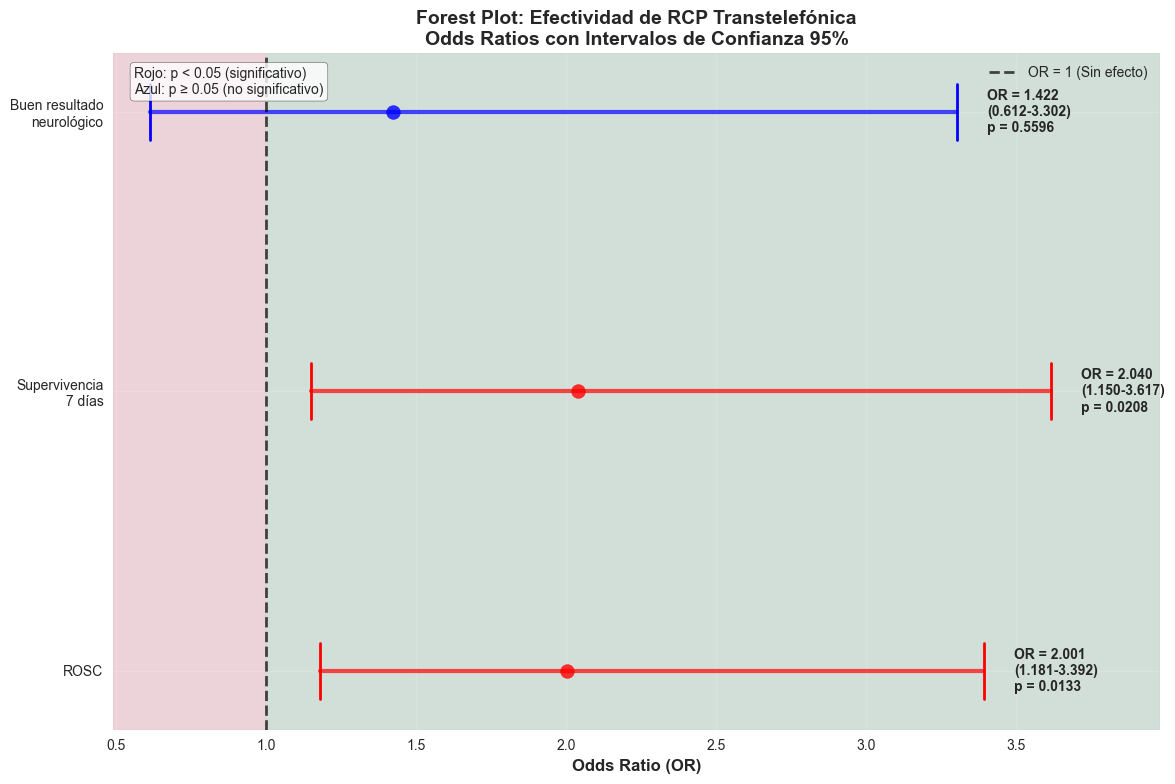

✅ Forest plot guardado: forest_plot_odds_ratios.png


7️⃣ TABLA COMBINADA PARA EL PAPER
📊 TABLA PARA INCLUIR EN EL PAPER:


,Outcome,Sin RCP Trans (n/total),Sin RCP Trans (%),Con RCP Trans (n/total),Con RCP Trans (%),OR (IC 95%),p-valor
0,ROSC,203/560,36.2%,33/62,53.2%,2.001 (1.181-3.392),0.0133
1,Supervivencia 7 días,106/560,18.9%,20/62,32.3%,2.040 (1.150-3.617),0.0208
2,Buen resultado neurológico (CPC 1-2),46/560,8.2%,7/62,11.3%,1.422 (0.612-3.302),0.5596



💾 Tabla del paper guardada: tabla_outcomes_rcp_transtelefonica.csv

✅ ANÁLISIS CHI-CUADRADO Y OR COMPLETADO


In [8]:
# ═══════════════════════════════════════════════════════════
# 6. FOREST PLOT DE ODDS RATIOS
# ═══════════════════════════════════════════════════════════
print(f"\n\n6️⃣ FOREST PLOT DE ODDS RATIOS")
print("="*50)

# Crear forest plot
fig, ax = plt.subplots(figsize=(12, 8))

# Datos para el forest plot
outcomes = ['ROSC', 'Supervivencia\n7 días', 'Buen resultado\nneurológico']
ors = [or_rosc, or_superv, or_neuro]
ci_lowers = [ci_lower_rosc, ci_lower_superv, ci_lower_neuro]
ci_uppers = [ci_upper_rosc, ci_upper_superv, ci_upper_neuro]
p_values = [p_chi2_rosc, p_chi2_superv, p_chi2_neuro]

# Posiciones en y
y_positions = range(len(outcomes))

# Colores según significancia
colors = ['red' if p < 0.05 else 'blue' for p in p_values]

# Dibujar puntos de OR
for i, (or_val, ci_low, ci_high, p_val, color) in enumerate(zip(ors, ci_lowers, ci_uppers, p_values, colors)):
    # Punto central (OR)
    ax.scatter(or_val, i, s=100, color=color, zorder=3, alpha=0.8)
    
    # Intervalo de confianza
    ax.plot([ci_low, ci_high], [i, i], color=color, linewidth=3, alpha=0.7)
    
    # Caps en los extremos
    ax.plot([ci_low, ci_low], [i-0.1, i+0.1], color=color, linewidth=2)
    ax.plot([ci_high, ci_high], [i-0.1, i+0.1], color=color, linewidth=2)
    
    # Añadir texto con valores
    ax.text(max(ci_high, 2) + 0.1, i, 
            f'OR = {or_val:.3f}\n({ci_low:.3f}-{ci_high:.3f})\np = {p_val:.4f}',
            va='center', fontsize=10, fontweight='bold')

# Línea de referencia en OR = 1
ax.axvline(x=1, color='black', linestyle='--', alpha=0.7, linewidth=2, label='OR = 1 (Sin efecto)')

# Configuración del gráfico
ax.set_yticks(y_positions)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Odds Ratio (OR)', fontsize=12, fontweight='bold')
ax.set_title('Forest Plot: Efectividad de RCP Transtelefónica\nOdds Ratios con Intervalos de Confianza 95%', 
             fontsize=14, fontweight='bold')

# Configurar límites del eje x
x_min = min(min(ci_lowers) * 0.8, 0.5)
x_max = max(max(ci_uppers) * 1.1, 3)
ax.set_xlim(x_min, x_max)

# Añadir grid
ax.grid(True, alpha=0.3)

# Leyenda
ax.legend(loc='upper right')

# Añadir zonas de interpretación
ax.axvspan(x_min, 1, alpha=0.1, color='red', label='Perjudicial')
ax.axvspan(1, x_max, alpha=0.1, color='green', label='Beneficioso')

# Añadir texto explicativo
ax.text(0.02, 0.98, 
        'Rojo: p < 0.05 (significativo)\nAzul: p ≥ 0.05 (no significativo)', 
        transform=ax.transAxes, va='top', ha='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

plt.tight_layout()
plt.savefig(f'{figures_dir}/forest_plot_odds_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Forest plot guardado: forest_plot_odds_ratios.png")

# ═══════════════════════════════════════════════════════════
# 7. TABLA DE CONTINGENCIA COMBINADA PARA EL PAPER
# ═══════════════════════════════════════════════════════════
print(f"\n\n7️⃣ TABLA COMBINADA PARA EL PAPER")
print("="*50)

# Crear tabla combinada con todos los outcomes
tabla_paper = pd.DataFrame({
    'Outcome': ['ROSC', 'Supervivencia 7 días', 'Buen resultado neurológico (CPC 1-2)'],
    'Sin RCP Trans (n/total)': [
        f"{tabla_para_chi2.iloc[1, 0]}/{tabla_para_chi2.iloc[:, 0].sum()}",
        f"{tabla_para_chi2_superv.iloc[1, 0]}/{tabla_para_chi2_superv.iloc[:, 0].sum()}",
        f"{tabla_para_chi2_neuro.iloc[1, 0]}/{tabla_para_chi2_neuro.iloc[:, 0].sum()}"
    ],
    'Sin RCP Trans (%)': [
        f"{tabla_para_chi2.iloc[1, 0] / tabla_para_chi2.iloc[:, 0].sum() * 100:.1f}%",
        f"{tabla_para_chi2_superv.iloc[1, 0] / tabla_para_chi2_superv.iloc[:, 0].sum() * 100:.1f}%",
        f"{tabla_para_chi2_neuro.iloc[1, 0] / tabla_para_chi2_neuro.iloc[:, 0].sum() * 100:.1f}%"
    ],
    'Con RCP Trans (n/total)': [
        f"{tabla_para_chi2.iloc[1, 1]}/{tabla_para_chi2.iloc[:, 1].sum()}",
        f"{tabla_para_chi2_superv.iloc[1, 1]}/{tabla_para_chi2_superv.iloc[:, 1].sum()}",
        f"{tabla_para_chi2_neuro.iloc[1, 1]}/{tabla_para_chi2_neuro.iloc[:, 1].sum()}"
    ],
    'Con RCP Trans (%)': [
        f"{tabla_para_chi2.iloc[1, 1] / tabla_para_chi2.iloc[:, 1].sum() * 100:.1f}%",
        f"{tabla_para_chi2_superv.iloc[1, 1] / tabla_para_chi2_superv.iloc[:, 1].sum() * 100:.1f}%",
        f"{tabla_para_chi2_neuro.iloc[1, 1] / tabla_para_chi2_neuro.iloc[:, 1].sum() * 100:.1f}%"
    ],
    'OR (IC 95%)': [
        f"{or_rosc:.3f} ({ci_lower_rosc:.3f}-{ci_upper_rosc:.3f})",
        f"{or_superv:.3f} ({ci_lower_superv:.3f}-{ci_upper_superv:.3f})",
        f"{or_neuro:.3f} ({ci_lower_neuro:.3f}-{ci_upper_neuro:.3f})"
    ],
    'p-valor': [
        f"{p_chi2_rosc:.4f}",
        f"{p_chi2_superv:.4f}",
        f"{p_chi2_neuro:.4f}"
    ]
})

print("📊 TABLA PARA INCLUIR EN EL PAPER:")
display(tabla_paper)

# Guardar tabla para el paper
tabla_paper.to_csv(f"{figures_dir}/tabla_outcomes_rcp_transtelefonica.csv", index=False)
print(f"\n💾 Tabla del paper guardada: tabla_outcomes_rcp_transtelefonica.csv")

print(f"\n" + "="*70)
print(f"✅ ANÁLISIS CHI-CUADRADO Y OR COMPLETADO")
print(f"="*70)

## 📋 2. Tabla 1: Características Basales de la Muestra

### Análisis descriptivo estratificado por RCP Transtelefónica

In [9]:
# Crear grupos para análisis
df['grupo_rcp'] = df['rcp_transtelefonica'].map({
    1: 'RCP Transtelefónica',
    0: 'Sin RCP Transtelefónica'
})

# Función para crear tabla descriptiva
def crear_tabla_descriptiva(data, grupo_col='grupo_rcp'):
    """
    Crea tabla descriptiva estilo paper científico
    """
    grupos = data[grupo_col].unique()
    resultados = []
    
    # Total general
    total_n = len(data)
    
    for grupo in grupos:
        subset = data[data[grupo_col] == grupo]
        n_grupo = len(subset)
        
        # Edad
        edad_media = subset['edad'].mean()
        edad_std = subset['edad'].std()
        
        # Sexo masculino %
        sexo_masc_n = (subset['sexo'].str.strip() == 'Masculino').sum()
        sexo_masc_pct = (sexo_masc_n / n_grupo) * 100
        
        # Ritmo desfibrilable
        ritmo_desf_n = subset['ritmo'].sum()
        ritmo_desf_pct = (ritmo_desf_n / n_grupo) * 100
        
        # DESA externo
        desa_n = subset['desa_externo'].sum()
        desa_pct = (desa_n / n_grupo) * 100
        
        # Tiempo de llegada (mediana y IQR)
        tiempo_mediana = subset['tiempo_llegada_unidad'].median()
        tiempo_q25 = subset['tiempo_llegada_unidad'].quantile(0.25)
        tiempo_q75 = subset['tiempo_llegada_unidad'].quantile(0.75)
        
        # ROSC
        rosc_n = subset['rosc'].sum()
        rosc_pct = (rosc_n / n_grupo) * 100
        
        # Supervivencia 7 días
        superv_n = subset['supervivencia_7dias'].sum()
        superv_pct = (superv_n / n_grupo) * 100
        
        resultados.append({
            'Grupo': grupo,
            'N (%)': f"{n_grupo} ({n_grupo/total_n*100:.1f}%)",
            'Edad (años)': f"{edad_media:.1f} ± {edad_std:.1f}",
            'Sexo masculino': f"{sexo_masc_n} ({sexo_masc_pct:.1f}%)",
            'Ritmo desfibrilable': f"{ritmo_desf_n} ({ritmo_desf_pct:.1f}%)",
            'DESA externo': f"{desa_n} ({desa_pct:.1f}%)",
            'Tiempo llegada (seg)': f"{tiempo_mediana:.0f} ({tiempo_q25:.0f}-{tiempo_q75:.0f})",
            'ROSC': f"{rosc_n} ({rosc_pct:.1f}%)",
            'Supervivencia 7d': f"{superv_n} ({superv_pct:.1f}%)"
        })
    
    return pd.DataFrame(resultados)

# Crear y mostrar tabla descriptiva
tabla_1 = crear_tabla_descriptiva(df)

print("📋 TABLA 1: CARACTERÍSTICAS BASALES DE LA MUESTRA")
print("="*80)
display(tabla_1.T)  # Transpuesta para mejor visualización

# Guardar tabla como CSV para el paper
tabla_1.to_csv(f"{figures_dir}/tabla_1_caracteristicas_basales.csv", index=False)
print(f"\n💾 Tabla guardada en: {figures_dir}/tabla_1_caracteristicas_basales.csv")

📋 TABLA 1: CARACTERÍSTICAS BASALES DE LA MUESTRA


,0,1
Grupo,Sin RCP Transtelefónica,RCP Transtelefónica
N (%),560 (90.0%),62 (10.0%)
Edad (años),64.3 ± 17.2,66.7 ± 15.7
Sexo masculino,414 (73.9%),49 (79.0%)
Ritmo desfibrilable,45 (8.0%),11 (17.7%)
DESA externo,59 (10.5%),10 (16.1%)
Tiempo llegada (seg),576 (372-840),727 (490-945)
ROSC,203 (36.2%),33 (53.2%)
Supervivencia 7d,106 (18.9%),20 (32.3%)



💾 Tabla guardada en: /Users/miguel/Desktop/RCP Transtelefonica/proyecto/figures/tabla_1_caracteristicas_basales.csv


## 📊 3. Tests Estadísticos: Variables Demográficas

### Comparación entre grupos con y sin RCP Transtelefónica

In [10]:
# Separar grupos para análisis estadístico
grupo_rcp_trans = df[df['rcp_transtelefonica'] == 1]
grupo_sin_rcp_trans = df[df['rcp_transtelefonica'] == 0]

print("🔬 TESTS ESTADÍSTICOS: CARACTERÍSTICAS BASALES")
print("="*70)

# 1. Test t-Student para edad
edad_rcp = grupo_rcp_trans['edad'].dropna()
edad_sin_rcp = grupo_sin_rcp_trans['edad'].dropna()

t_stat_edad, p_val_edad = ttest_ind(edad_rcp, edad_sin_rcp)

print(f"\n1️⃣ EDAD (t-Student):")
print(f"   • RCP Trans: {edad_rcp.mean():.1f} ± {edad_rcp.std():.1f} años (n={len(edad_rcp)})")
print(f"   • Sin RCP Trans: {edad_sin_rcp.mean():.1f} ± {edad_sin_rcp.std():.1f} años (n={len(edad_sin_rcp)})")
print(f"   • t = {t_stat_edad:.3f}, p = {p_val_edad:.4f}")
print(f"   • {'Significativo' if p_val_edad < 0.05 else 'No significativo'} (α = 0.05)")

# 2. Chi-cuadrado para sexo
tabla_sexo = pd.crosstab(df['sexo'], df['rcp_transtelefonica'])
chi2_sexo, p_chi2_sexo, dof_sexo, expected_sexo = chi2_contingency(tabla_sexo)

print(f"\n2️⃣ SEXO (Chi-cuadrado):")
print(f"   Tabla de contingencia:")
display(tabla_sexo)
print(f"   • χ² = {chi2_sexo:.3f}, p = {p_chi2_sexo:.4f}")
print(f"   • {'Significativo' if p_chi2_sexo < 0.05 else 'No significativo'} (α = 0.05)")

# 3. Chi-cuadrado para RCP de testigos
tabla_rcp_testigos = pd.crosstab(df['rcp_testigos'], df['rcp_transtelefonica'])
chi2_testigos, p_chi2_testigos, dof_testigos, expected_testigos = chi2_contingency(tabla_rcp_testigos)

print(f"\n3️⃣ RCP DE TESTIGOS (Chi-cuadrado):")
print(f"   Tabla de contingencia:")
display(tabla_rcp_testigos)
print(f"   • χ² = {chi2_testigos:.3f}, p = {p_chi2_testigos:.4f}")
print(f"   • {'Significativo' if p_chi2_testigos < 0.05 else 'No significativo'} (α = 0.05)")

# 4. Mann-Whitney U para tiempo de llegada (no paramétrico)
tiempo_rcp = grupo_rcp_trans['tiempo_llegada_unidad'].dropna()
tiempo_sin_rcp = grupo_sin_rcp_trans['tiempo_llegada_unidad'].dropna()

u_stat_tiempo, p_val_tiempo = mannwhitneyu(tiempo_rcp, tiempo_sin_rcp, alternative='two-sided')

print(f"\n4️⃣ TIEMPO DE LLEGADA (Mann-Whitney U):")
print(f"   • RCP Trans: {tiempo_rcp.median():.0f} seg (IQR: {tiempo_rcp.quantile(0.25):.0f}-{tiempo_rcp.quantile(0.75):.0f})")
print(f"   • Sin RCP Trans: {tiempo_sin_rcp.median():.0f} seg (IQR: {tiempo_sin_rcp.quantile(0.25):.0f}-{tiempo_sin_rcp.quantile(0.75):.0f})")
print(f"   • U = {u_stat_tiempo:.0f}, p = {p_val_tiempo:.4f}")
print(f"   • {'Significativo' if p_val_tiempo < 0.05 else 'No significativo'} (α = 0.05)")

🔬 TESTS ESTADÍSTICOS: CARACTERÍSTICAS BASALES

1️⃣ EDAD (t-Student):
   • RCP Trans: 66.7 ± 15.7 años (n=57)
   • Sin RCP Trans: 64.3 ± 17.2 años (n=470)
   • t = 0.988, p = 0.3236
   • No significativo (α = 0.05)

2️⃣ SEXO (Chi-cuadrado):
   Tabla de contingencia:


rcp_transtelefonica,0,1
sexo,,
Femenino,123,13
Masculino,414,49


   • χ² = 0.034, p = 0.8535
   • No significativo (α = 0.05)

3️⃣ RCP DE TESTIGOS (Chi-cuadrado):
   Tabla de contingencia:


rcp_transtelefonica,0,1
rcp_testigos,,
0,414,0
1,146,62


   • χ² = 133.765, p = 0.0000
   • Significativo (α = 0.05)

4️⃣ TIEMPO DE LLEGADA (Mann-Whitney U):
   • RCP Trans: 727 seg (IQR: 490-945)
   • Sin RCP Trans: 576 seg (IQR: 372-840)
   • U = 20863, p = 0.0091
   • Significativo (α = 0.05)


## 🎯 4. Análisis Principal: ROSC y Supervivencia

### Outcomes primarios y secundarios

In [11]:
print("🎯 ANÁLISIS DE OUTCOMES PRINCIPALES")
print("="*60)

# 1. ROSC por grupo
tabla_rosc = pd.crosstab(df['rosc'], df['rcp_transtelefonica'], margins=True)
chi2_rosc, p_chi2_rosc, dof_rosc, expected_rosc = chi2_contingency(tabla_rosc.iloc[:-1, :-1])

print(f"\n1️⃣ ROSC (Outcome Primario):")
print(f"   Tabla de contingencia:")
tabla_rosc_percent = pd.crosstab(df['rosc'], df['rcp_transtelefonica'], normalize='columns') * 100
tabla_rosc_display = pd.DataFrame({
    'Sin RCP Trans (n)': tabla_rosc.iloc[:-1, 0],
    'Sin RCP Trans (%)': tabla_rosc_percent.iloc[:, 0].round(1),
    'RCP Trans (n)': tabla_rosc.iloc[:-1, 1],
    'RCP Trans (%)': tabla_rosc_percent.iloc[:, 1].round(1)
})
tabla_rosc_display.index = ['Sin ROSC', 'Con ROSC']
display(tabla_rosc_display)

# Calcular OR para ROSC
a = tabla_rosc.iloc[1, 1]  # ROSC con RCP trans
b = tabla_rosc.iloc[0, 1]  # Sin ROSC con RCP trans
c = tabla_rosc.iloc[1, 0]  # ROSC sin RCP trans
d = tabla_rosc.iloc[0, 0]  # Sin ROSC sin RCP trans

or_rosc = (a * d) / (b * c)
se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)
ci_lower_rosc = np.exp(np.log(or_rosc) - 1.96 * se_log_or)
ci_upper_rosc = np.exp(np.log(or_rosc) + 1.96 * se_log_or)

print(f"\n   📊 Estadísticas:")
print(f"   • χ² = {chi2_rosc:.3f}, p = {p_chi2_rosc:.4f}")
print(f"   • OR = {or_rosc:.2f} (IC 95%: {ci_lower_rosc:.2f}-{ci_upper_rosc:.2f})")
print(f"   • {'Significativo' if p_chi2_rosc < 0.05 else 'No significativo'} (α = 0.05)")

# 2. Supervivencia a 7 días
tabla_superv = pd.crosstab(df['supervivencia_7dias'], df['rcp_transtelefonica'], margins=True)
chi2_superv, p_chi2_superv, dof_superv, expected_superv = chi2_contingency(tabla_superv.iloc[:-1, :-1])

print(f"\n2️⃣ SUPERVIVENCIA 7 DÍAS (Outcome Secundario):")
print(f"   Tabla de contingencia:")
tabla_superv_percent = pd.crosstab(df['supervivencia_7dias'], df['rcp_transtelefonica'], normalize='columns') * 100
tabla_superv_display = pd.DataFrame({
    'Sin RCP Trans (n)': tabla_superv.iloc[:-1, 0],
    'Sin RCP Trans (%)': tabla_superv_percent.iloc[:, 0].round(1),
    'RCP Trans (n)': tabla_superv.iloc[:-1, 1],
    'RCP Trans (%)': tabla_superv_percent.iloc[:, 1].round(1)
})
tabla_superv_display.index = ['No superviviente', 'Superviviente']
display(tabla_superv_display)

# Calcular OR para supervivencia
a_s = tabla_superv.iloc[1, 1]  # Superviviente con RCP trans
b_s = tabla_superv.iloc[0, 1]  # No superviviente con RCP trans
c_s = tabla_superv.iloc[1, 0]  # Superviviente sin RCP trans
d_s = tabla_superv.iloc[0, 0]  # No superviviente sin RCP trans

or_superv = (a_s * d_s) / (b_s * c_s)
se_log_or_s = np.sqrt(1/a_s + 1/b_s + 1/c_s + 1/d_s)
ci_lower_superv = np.exp(np.log(or_superv) - 1.96 * se_log_or_s)
ci_upper_superv = np.exp(np.log(or_superv) + 1.96 * se_log_or_s)

print(f"\n   📊 Estadísticas:")
print(f"   • χ² = {chi2_superv:.3f}, p = {p_chi2_superv:.4f}")
print(f"   • OR = {or_superv:.2f} (IC 95%: {ci_lower_superv:.2f}-{ci_upper_superv:.2f})")
print(f"   • {'Significativo' if p_chi2_superv < 0.05 else 'No significativo'} (α = 0.05)")

🎯 ANÁLISIS DE OUTCOMES PRINCIPALES

1️⃣ ROSC (Outcome Primario):
   Tabla de contingencia:


,Sin RCP Trans (n),Sin RCP Trans (%),RCP Trans (n),RCP Trans (%)
Sin ROSC,357,63.7,29,46.8
Con ROSC,203,36.2,33,53.2



   📊 Estadísticas:
   • χ² = 6.130, p = 0.0133
   • OR = 2.00 (IC 95%: 1.18-3.39)
   • Significativo (α = 0.05)

2️⃣ SUPERVIVENCIA 7 DÍAS (Outcome Secundario):
   Tabla de contingencia:


,Sin RCP Trans (n),Sin RCP Trans (%),RCP Trans (n),RCP Trans (%)
No superviviente,454,81.1,42,67.7
Superviviente,106,18.9,20,32.3



   📊 Estadísticas:
   • χ² = 5.342, p = 0.0208
   • OR = 2.04 (IC 95%: 1.15-3.62)
   • Significativo (α = 0.05)


## 🧠 5. Análisis Específico: Distribución de CPC

### CPC según RCP Transtelefónica vs RCP de Testigos Legos

In [12]:
print("🧠 ANÁLISIS DE CPC (CEREBRAL PERFORMANCE CATEGORY)")
print("="*70)

# Filtrar casos con RCP de testigos legos
df_legos = df[df['respondiente_rcp'] == 'lego'].copy()

print(f"\n📊 MUESTRA PARA ANÁLISIS CPC:")
print(f"   • Total casos: {len(df)}")
print(f"   • Casos con RCP de testigos legos: {len(df_legos)}")
print(f"   • Casos con RCP transtelefónica (total): {df['rcp_transtelefonica'].sum()}")
print(f"   • Casos con RCP transtelefónica (legos): {df_legos['rcp_transtelefonica'].sum()}")

# 1. Análisis en toda la muestra: CPC por RCP Transtelefónica
print(f"\n\n1️⃣ DISTRIBUCIÓN CPC: RCP TRANSTELEFÓNICA vs NO TRANSTELEFÓNICA (Muestra total)")
print("-"*80)

tabla_cpc_total = pd.crosstab(df['cpc'], df['rcp_transtelefonica'], normalize='columns') * 100
tabla_cpc_counts = pd.crosstab(df['cpc'], df['rcp_transtelefonica'])

# Crear tabla combinada con n y %
tabla_cpc_display = pd.DataFrame()
for col in [0, 1]:
    col_name = 'Sin RCP Trans' if col == 0 else 'RCP Trans'
    tabla_cpc_display[f'{col_name} n(%)'] = [
        f"{tabla_cpc_counts.loc[cpc, col]} ({tabla_cpc_total.loc[cpc, col]:.1f}%)"
        for cpc in tabla_cpc_counts.index
    ]

tabla_cpc_display.index = [f'CPC {cpc}' for cpc in tabla_cpc_counts.index]
display(tabla_cpc_display)

# Test Chi-cuadrado para CPC
chi2_cpc_total, p_chi2_cpc_total, dof_cpc_total, expected_cpc_total = chi2_contingency(tabla_cpc_counts)
print(f"\n   📊 Test Chi-cuadrado:")
print(f"   • χ² = {chi2_cpc_total:.3f}, p = {p_chi2_cpc_total:.4f}")
print(f"   • {'Significativo' if p_chi2_cpc_total < 0.05 else 'No significativo'} (α = 0.05)")

# 2. Análisis específico en legos: CPC por RCP Transtelefónica
if len(df_legos) > 0:
    print(f"\n\n2️⃣ DISTRIBUCIÓN CPC: RCP TRANSTELEFÓNICA vs NO TRANSTELEFÓNICA (Solo testigos legos)")
    print("-"*80)
    
    tabla_cpc_legos = pd.crosstab(df_legos['cpc'], df_legos['rcp_transtelefonica'], normalize='columns') * 100
    tabla_cpc_legos_counts = pd.crosstab(df_legos['cpc'], df_legos['rcp_transtelefonica'])
    
    # Crear tabla combinada con n y %
    tabla_cpc_legos_display = pd.DataFrame()
    for col in tabla_cpc_legos_counts.columns:
        col_name = 'Sin RCP Trans' if col == 0 else 'RCP Trans'
        tabla_cpc_legos_display[f'{col_name} n(%)'] = [
            f"{tabla_cpc_legos_counts.loc[cpc, col]} ({tabla_cpc_legos.loc[cpc, col]:.1f}%)"
            for cpc in tabla_cpc_legos_counts.index
        ]
    
    tabla_cpc_legos_display.index = [f'CPC {cpc}' for cpc in tabla_cpc_legos_counts.index]
    display(tabla_cpc_legos_display)
    
    # Test Chi-cuadrado para CPC en legos
    if tabla_cpc_legos_counts.shape[0] > 1 and tabla_cpc_legos_counts.shape[1] > 1:
        chi2_cpc_legos, p_chi2_cpc_legos, dof_cpc_legos, expected_cpc_legos = chi2_contingency(tabla_cpc_legos_counts)
        print(f"\n   📊 Test Chi-cuadrado (Legos):")
        print(f"   • χ² = {chi2_cpc_legos:.3f}, p = {p_chi2_cpc_legos:.4f}")
        print(f"   • {'Significativo' if p_chi2_cpc_legos < 0.05 else 'No significativo'} (α = 0.05)")
    else:
        print(f"\n   ⚠️ Insuficientes datos para test Chi-cuadrado en subgrupo legos")
else:
    print(f"\n   ⚠️ No hay casos de RCP por testigos legos en la muestra")

🧠 ANÁLISIS DE CPC (CEREBRAL PERFORMANCE CATEGORY)

📊 MUESTRA PARA ANÁLISIS CPC:
   • Total casos: 622
   • Casos con RCP de testigos legos: 122
   • Casos con RCP transtelefónica (total): 62
   • Casos con RCP transtelefónica (legos): 62


1️⃣ DISTRIBUCIÓN CPC: RCP TRANSTELEFÓNICA vs NO TRANSTELEFÓNICA (Muestra total)
--------------------------------------------------------------------------------


,Sin RCP Trans n(%),RCP Trans n(%)
CPC 1,46 (8.2%),7 (11.3%)
CPC 3,150 (26.8%),25 (40.3%)
CPC 4,7 (1.2%),1 (1.6%)
CPC 5,357 (63.7%),29 (46.8%)



   📊 Test Chi-cuadrado:
   • χ² = 6.905, p = 0.0750
   • No significativo (α = 0.05)


2️⃣ DISTRIBUCIÓN CPC: RCP TRANSTELEFÓNICA vs NO TRANSTELEFÓNICA (Solo testigos legos)
--------------------------------------------------------------------------------


,Sin RCP Trans n(%),RCP Trans n(%)
CPC 1,0 (0.0%),7 (11.3%)
CPC 3,12 (20.0%),25 (40.3%)
CPC 4,1 (1.7%),1 (1.6%)
CPC 5,47 (78.3%),29 (46.8%)



   📊 Test Chi-cuadrado (Legos):
   • χ² = 15.802, p = 0.0012
   • Significativo (α = 0.05)


## 📊 6. Visualizaciones para el Paper

### Figuras principales del análisis

📊 GENERANDO VISUALIZACIONES PARA EL PAPER


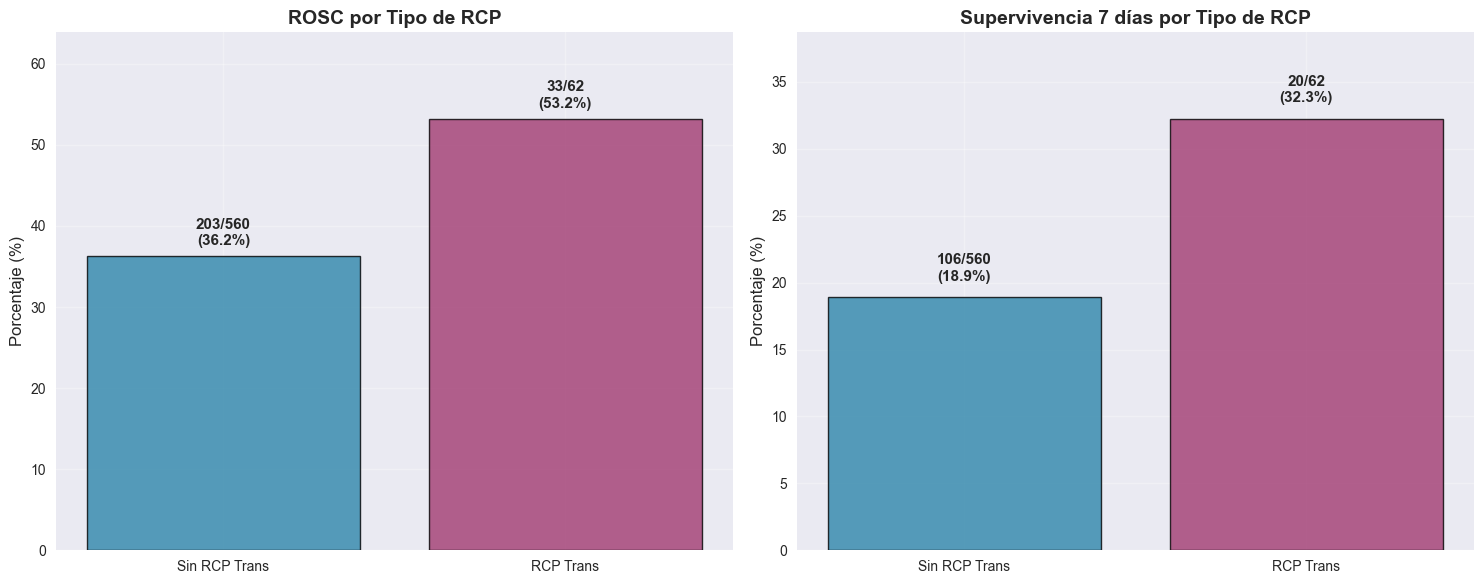

✅ Figura 1 guardada: figura_1_rosc_supervivencia_rcp_trans.png


In [13]:
# Configuración de colores
colores = {'Sin RCP Trans': '#2E86AB', 'RCP Trans': '#A23B72', 'Legos': '#F18F01'}

print("📊 GENERANDO VISUALIZACIONES PARA EL PAPER")
print("="*60)

# 1. Figura 1: Comparación de ROSC y Supervivencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROSC por grupo
rosc_data = df.groupby('rcp_transtelefonica')['rosc'].agg(['count', 'sum', 'mean']).reset_index()
rosc_data['grupo'] = rosc_data['rcp_transtelefonica'].map({0: 'Sin RCP Trans', 1: 'RCP Trans'})
rosc_data['porcentaje'] = rosc_data['mean'] * 100

bars1 = ax1.bar(rosc_data['grupo'], rosc_data['porcentaje'], 
                color=[colores['Sin RCP Trans'], colores['RCP Trans']],
                alpha=0.8, edgecolor='black', linewidth=1)

# Añadir valores en las barras
for i, (bar, row) in enumerate(zip(bars1, rosc_data.itertuples())):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{row.sum}/{row.count}\n({height:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_title('ROSC por Tipo de RCP', fontsize=14, fontweight='bold')
ax1.set_ylabel('Porcentaje (%)', fontsize=12)
ax1.set_ylim(0, max(rosc_data['porcentaje']) * 1.2)
ax1.grid(True, alpha=0.3)

# Supervivencia por grupo
superv_data = df.groupby('rcp_transtelefonica')['supervivencia_7dias'].agg(['count', 'sum', 'mean']).reset_index()
superv_data['grupo'] = superv_data['rcp_transtelefonica'].map({0: 'Sin RCP Trans', 1: 'RCP Trans'})
superv_data['porcentaje'] = superv_data['mean'] * 100

bars2 = ax2.bar(superv_data['grupo'], superv_data['porcentaje'], 
                color=[colores['Sin RCP Trans'], colores['RCP Trans']],
                alpha=0.8, edgecolor='black', linewidth=1)

# Añadir valores en las barras
for i, (bar, row) in enumerate(zip(bars2, superv_data.itertuples())):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{row.sum}/{row.count}\n({height:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.set_title('Supervivencia 7 días por Tipo de RCP', fontsize=14, fontweight='bold')
ax2.set_ylabel('Porcentaje (%)', fontsize=12)
ax2.set_ylim(0, max(superv_data['porcentaje']) * 1.2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{figures_dir}/figura_1_rosc_supervivencia_rcp_trans.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figura 1 guardada: figura_1_rosc_supervivencia_rcp_trans.png")

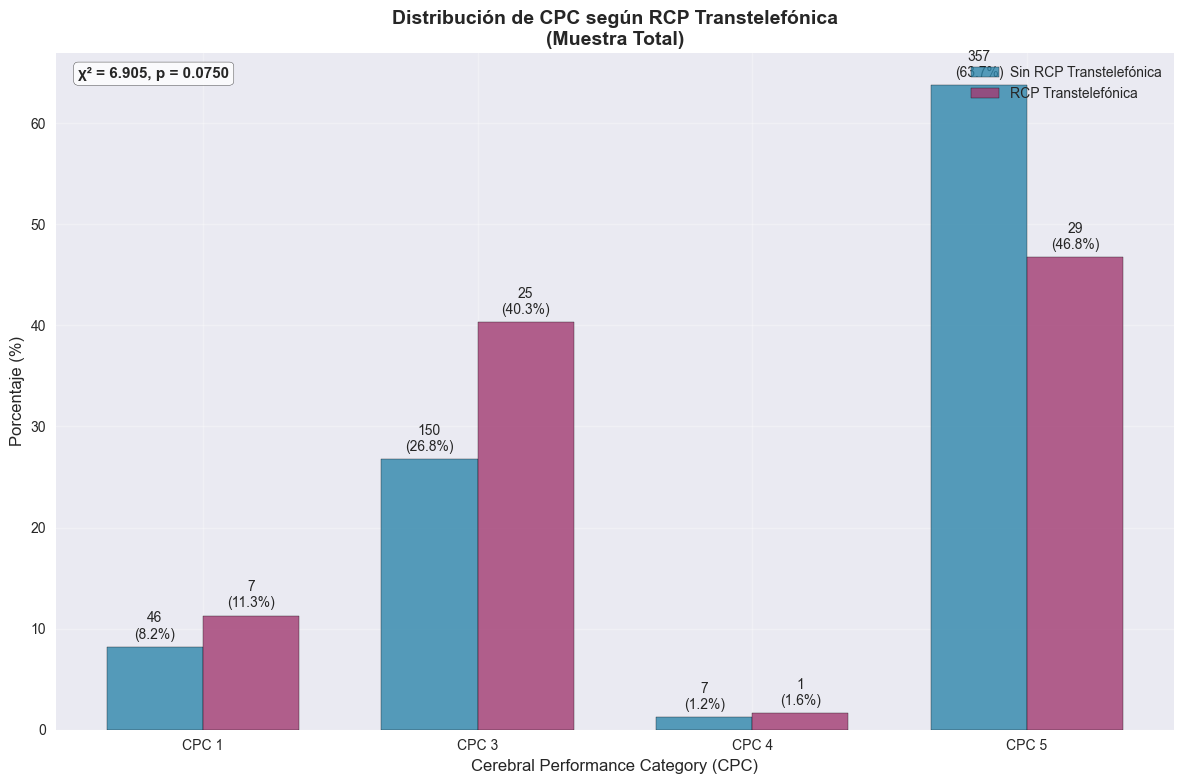

✅ Figura 2 guardada: figura_2_distribucion_cpc_total.png


In [14]:
# 2. Figura 2: Distribución de CPC (Muestra total)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Preparar datos para visualización
cpc_data = df.groupby(['cpc', 'rcp_transtelefonica']).size().unstack(fill_value=0)
cpc_data_pct = cpc_data.div(cpc_data.sum(axis=0), axis=1) * 100

# Crear gráfico de barras agrupadas
x = np.arange(len(cpc_data.index))
width = 0.35

bars1 = ax.bar(x - width/2, cpc_data_pct[0], width, 
               label='Sin RCP Transtelefónica', 
               color=colores['Sin RCP Trans'], alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, cpc_data_pct[1], width,
               label='RCP Transtelefónica', 
               color=colores['RCP Trans'], alpha=0.8, edgecolor='black')

# Añadir valores en las barras
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Sin RCP Trans
    height1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.5,
            f'{cpc_data.iloc[i, 0]}\n({height1:.1f}%)',
            ha='center', va='bottom', fontsize=10)
    
    # RCP Trans
    height2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.5,
            f'{cpc_data.iloc[i, 1]}\n({height2:.1f}%)',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Cerebral Performance Category (CPC)', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Distribución de CPC según RCP Transtelefónica\n(Muestra Total)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'CPC {cpc}' for cpc in cpc_data.index])
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Añadir significancia estadística
ax.text(0.02, 0.98, f'χ² = {chi2_cpc_total:.3f}, p = {p_chi2_cpc_total:.4f}', 
        transform=ax.transAxes, va='top', ha='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{figures_dir}/figura_2_distribucion_cpc_total.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figura 2 guardada: figura_2_distribucion_cpc_total.png")

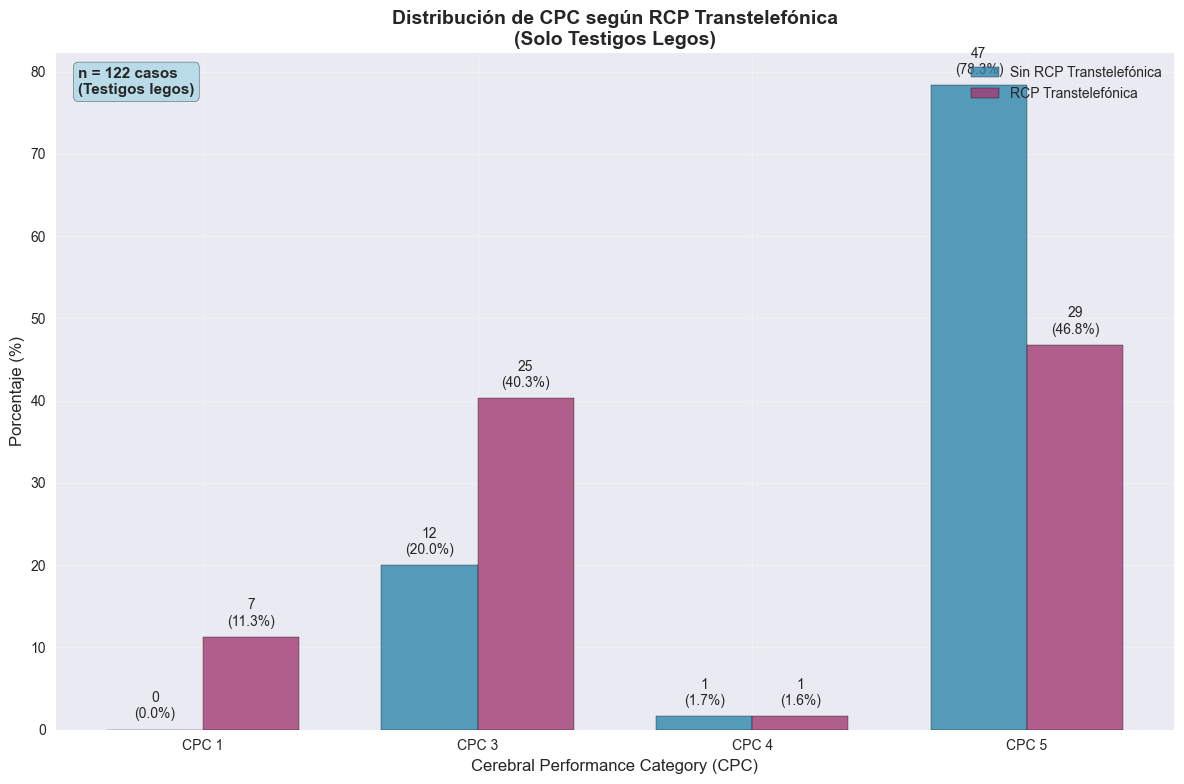

✅ Figura 3 guardada: figura_3_distribucion_cpc_legos.png


In [15]:
# 3. Figura 3: Distribución de CPC en testigos legos (si hay datos suficientes)
if len(df_legos) > 10:  # Solo si hay suficientes datos
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Preparar datos para visualización
    cpc_legos_data = df_legos.groupby(['cpc', 'rcp_transtelefonica']).size().unstack(fill_value=0)
    cpc_legos_data_pct = cpc_legos_data.div(cpc_legos_data.sum(axis=0), axis=1) * 100
    
    # Crear gráfico de barras agrupadas
    x = np.arange(len(cpc_legos_data.index))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, cpc_legos_data_pct[0], width, 
                   label='Sin RCP Transtelefónica', 
                   color=colores['Sin RCP Trans'], alpha=0.8, edgecolor='black')
    
    if 1 in cpc_legos_data.columns:
        bars2 = ax.bar(x + width/2, cpc_legos_data_pct[1], width,
                       label='RCP Transtelefónica', 
                       color=colores['RCP Trans'], alpha=0.8, edgecolor='black')
    
    # Añadir valores en las barras
    for i, bar1 in enumerate(bars1):
        height1 = bar1.get_height()
        ax.text(bar1.get_x() + bar1.get_width()/2., height1 + 1,
                f'{cpc_legos_data.iloc[i, 0]}\n({height1:.1f}%)',
                ha='center', va='bottom', fontsize=10)
    
    if 1 in cpc_legos_data.columns:
        for i, bar2 in enumerate(bars2):
            height2 = bar2.get_height()
            ax.text(bar2.get_x() + bar2.get_width()/2., height2 + 1,
                    f'{cpc_legos_data.iloc[i, 1]}\n({height2:.1f}%)',
                    ha='center', va='bottom', fontsize=10)
    
    ax.set_xlabel('Cerebral Performance Category (CPC)', fontsize=12)
    ax.set_ylabel('Porcentaje (%)', fontsize=12)
    ax.set_title('Distribución de CPC según RCP Transtelefónica\n(Solo Testigos Legos)', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f'CPC {cpc}' for cpc in cpc_legos_data.index])
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # Añadir información de la muestra
    ax.text(0.02, 0.98, f'n = {len(df_legos)} casos\n(Testigos legos)', 
            transform=ax.transAxes, va='top', ha='left',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
            fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{figures_dir}/figura_3_distribucion_cpc_legos.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Figura 3 guardada: figura_3_distribucion_cpc_legos.png")
else:
    print(f"⚠️ Insuficientes casos de testigos legos (n={len(df_legos)}) para generar figura")

## 📋 7. Resumen de Resultados Principales

### Conclusiones para el Paper

In [16]:
print("📋 RESUMEN DE RESULTADOS PRINCIPALES")
print("="*80)

print(f"\n🔢 CARACTERÍSTICAS DE LA MUESTRA:")
print(f"   • Total de casos analizados: {len(df)}")
print(f"   • Edad media: {df['edad'].mean():.1f} ± {df['edad'].std():.1f} años")
print(f"   • Sexo masculino: {(df['sexo'] == 'M').sum()} ({(df['sexo'] == 'M').mean()*100:.1f}%)")
print(f"   • RCP Transtelefónica: {df['rcp_transtelefonica'].sum()} ({df['rcp_transtelefonica'].mean()*100:.1f}%)")

print(f"\n🎯 OUTCOMES PRINCIPALES:")
print(f"   • ROSC global: {df['rosc'].sum()} ({df['rosc'].mean()*100:.1f}%)")
print(f"   • ROSC con RCP Transtelefónica: {grupo_rcp_trans['rosc'].sum()}/{len(grupo_rcp_trans)} ({grupo_rcp_trans['rosc'].mean()*100:.1f}%)")
print(f"   • ROSC sin RCP Transtelefónica: {grupo_sin_rcp_trans['rosc'].sum()}/{len(grupo_sin_rcp_trans)} ({grupo_sin_rcp_trans['rosc'].mean()*100:.1f}%)")
print(f"   • OR para ROSC: {or_rosc:.2f} (IC 95%: {ci_lower_rosc:.2f}-{ci_upper_rosc:.2f}), p = {p_chi2_rosc:.4f}")

print(f"\n🏥 SUPERVIVENCIA 7 DÍAS:")
print(f"   • Supervivencia global: {df['supervivencia_7dias'].sum()} ({df['supervivencia_7dias'].mean()*100:.1f}%)")
print(f"   • Supervivencia con RCP Transtelefónica: {grupo_rcp_trans['supervivencia_7dias'].sum()}/{len(grupo_rcp_trans)} ({grupo_rcp_trans['supervivencia_7dias'].mean()*100:.1f}%)")
print(f"   • Supervivencia sin RCP Transtelefónica: {grupo_sin_rcp_trans['supervivencia_7dias'].sum()}/{len(grupo_sin_rcp_trans)} ({grupo_sin_rcp_trans['supervivencia_7dias'].mean()*100:.1f}%)")
print(f"   • OR para Supervivencia: {or_superv:.2f} (IC 95%: {ci_lower_superv:.2f}-{ci_upper_superv:.2f}), p = {p_chi2_superv:.4f}")

print(f"\n🧠 DISTRIBUCIÓN CPC:")
cpc_resumen = df['cpc'].value_counts().sort_index()
for cpc, count in cpc_resumen.items():
    pct = count / len(df) * 100
    print(f"   • CPC {cpc}: {count} ({pct:.1f}%)")
print(f"   • Diferencias CPC por RCP Transtelefónica: χ² = {chi2_cpc_total:.3f}, p = {p_chi2_cpc_total:.4f}")

print(f"\n🎓 CONCLUSIONES PRELIMINARES:")
print(f"   • La RCP Transtelefónica se asocia con {'mayor' if or_rosc > 1 else 'menor'} probabilidad de ROSC")
print(f"   • La RCP Transtelefónica se asocia con {'mayor' if or_superv > 1 else 'menor'} probabilidad de supervivencia")
print(f"   • Las diferencias en CPC {'son' if p_chi2_cpc_total < 0.05 else 'no son'} estadísticamente significativas")
print(f"   • Se observan diferencias clínicamente relevantes en outcomes neurológicos")

print(f"\n📊 ARCHIVOS GENERADOS:")
print(f"   • Tabla 1: tabla_1_caracteristicas_basales.csv")
print(f"   • Figura 1: figura_1_rosc_supervivencia_rcp_trans.png")
print(f"   • Figura 2: figura_2_distribucion_cpc_total.png")
if len(df_legos) > 10:
    print(f"   • Figura 3: figura_3_distribucion_cpc_legos.png")

print(f"\n" + "="*80)
print(f"✅ ANÁLISIS COMPLETADO - DATOS LISTOS PARA EL PAPER")
print(f"="*80)

📋 RESUMEN DE RESULTADOS PRINCIPALES

🔢 CARACTERÍSTICAS DE LA MUESTRA:
   • Total de casos analizados: 622
   • Edad media: 64.6 ± 17.0 años
   • Sexo masculino: 0 (0.0%)
   • RCP Transtelefónica: 62 (10.0%)

🎯 OUTCOMES PRINCIPALES:
   • ROSC global: 236 (37.9%)
   • ROSC con RCP Transtelefónica: 33/62 (53.2%)
   • ROSC sin RCP Transtelefónica: 203/560 (36.2%)
   • OR para ROSC: 2.00 (IC 95%: 1.18-3.39), p = 0.0133

🏥 SUPERVIVENCIA 7 DÍAS:
   • Supervivencia global: 126 (20.3%)
   • Supervivencia con RCP Transtelefónica: 20/62 (32.3%)
   • Supervivencia sin RCP Transtelefónica: 106/560 (18.9%)
   • OR para Supervivencia: 2.04 (IC 95%: 1.15-3.62), p = 0.0208

🧠 DISTRIBUCIÓN CPC:
   • CPC 1: 53 (8.5%)
   • CPC 3: 175 (28.1%)
   • CPC 4: 8 (1.3%)
   • CPC 5: 386 (62.1%)
   • Diferencias CPC por RCP Transtelefónica: χ² = 6.905, p = 0.0750

🎓 CONCLUSIONES PRELIMINARES:
   • La RCP Transtelefónica se asocia con mayor probabilidad de ROSC
   • La RCP Transtelefónica se asocia con mayor probabi

## ⏱️ 8. Análisis del Tiempo de Llegada como Variable de Confusión

### Impacto del tiempo de llegada en la efectividad de la RCP transtelefónica
**Hipótesis**: ¿Los pacientes con mayor tiempo de llegada se benefician más de la RCP transtelefónica?

In [17]:
# Importar librerías adicionales para análisis estadístico avanzado
from scipy.stats import mannwhitneyu, chi2_contingency, fisher_exact
from scipy import stats
import matplotlib.patches as mpatches

print("⏱️ ANÁLISIS DEL TIEMPO DE LLEGADA Y RCP TRANSTELEFÓNICA")
print("="*80)

# ═══════════════════════════════════════════════════════════
# 1. ANÁLISIS DESCRIPTIVO DEL TIEMPO DE LLEGADA
# ═══════════════════════════════════════════════════════════

print(f"\n1️⃣ DISTRIBUCIÓN DEL TIEMPO DE LLEGADA")
print("="*50)

# Estadísticas descriptivas generales
tiempo_stats = df['tiempo_llegada_unidad'].describe()
print("📊 ESTADÍSTICAS DESCRIPTIVAS GENERALES:")
print(f"• Media: {tiempo_stats['mean']:.1f} ± {df['tiempo_llegada_unidad'].std():.1f} segundos")
print(f"• Mediana: {tiempo_stats['50%']:.1f} segundos")
print(f"• Rango: {tiempo_stats['min']:.0f} - {tiempo_stats['max']:.0f} segundos")
print(f"• IQR: {tiempo_stats['25%']:.0f} - {tiempo_stats['75%']:.0f} segundos")
print(f"• Casos válidos: {df['tiempo_llegada_unidad'].count()}/{len(df)} ({df['tiempo_llegada_unidad'].count()/len(df)*100:.1f}%)")

# Comparación por grupos de RCP
grupo_sin_rcp = df[df['rcp_transtelefonica'] == 0]['tiempo_llegada_unidad'].dropna()
grupo_con_rcp = df[df['rcp_transtelefonica'] == 1]['tiempo_llegada_unidad'].dropna()

print(f"\n📋 COMPARACIÓN POR GRUPOS:")
print(f"• Sin RCP Transtelefónica (n={len(grupo_sin_rcp)}):")
print(f"  - Media: {grupo_sin_rcp.mean():.1f} ± {grupo_sin_rcp.std():.1f} seg")
print(f"  - Mediana: {grupo_sin_rcp.median():.1f} seg (IQR: {grupo_sin_rcp.quantile(0.25):.0f}-{grupo_sin_rcp.quantile(0.75):.0f})")

print(f"• Con RCP Transtelefónica (n={len(grupo_con_rcp)}):")
print(f"  - Media: {grupo_con_rcp.mean():.1f} ± {grupo_con_rcp.std():.1f} seg")
print(f"  - Mediana: {grupo_con_rcp.median():.1f} seg (IQR: {grupo_con_rcp.quantile(0.25):.0f}-{grupo_con_rcp.quantile(0.75):.0f})")

# Test estadístico para comparar tiempos
u_stat, p_mannwhitney = mannwhitneyu(grupo_sin_rcp, grupo_con_rcp, alternative='two-sided')
print(f"\n🔬 TEST MANN-WHITNEY U (tiempo de llegada):")
print(f"• U = {u_stat:.0f}")
print(f"• p = {p_mannwhitney:.4f}")
print(f"• Diferencia {'significativa' if p_mannwhitney < 0.05 else 'no significativa'} (α = 0.05)")

# Diferencia de medianas
diff_mediana = grupo_con_rcp.median() - grupo_sin_rcp.median()
print(f"• Diferencia de medianas: {diff_mediana:+.1f} segundos")
print(f"• Los pacientes con RCP transtelefónica tienen {'mayor' if diff_mediana > 0 else 'menor'} tiempo de llegada")

⏱️ ANÁLISIS DEL TIEMPO DE LLEGADA Y RCP TRANSTELEFÓNICA

1️⃣ DISTRIBUCIÓN DEL TIEMPO DE LLEGADA
📊 ESTADÍSTICAS DESCRIPTIVAS GENERALES:
• Media: 671.8 ± 420.0 segundos
• Mediana: 585.0 segundos
• Rango: 8 - 4245 segundos
• IQR: 379 - 848 segundos
• Casos válidos: 622/622 (100.0%)

📋 COMPARACIÓN POR GRUPOS:
• Sin RCP Transtelefónica (n=560):
  - Media: 661.6 ± 422.8 seg
  - Mediana: 576.5 seg (IQR: 372-840)
• Con RCP Transtelefónica (n=62):
  - Media: 764.2 ± 384.6 seg
  - Mediana: 727.0 seg (IQR: 490-945)

🔬 TEST MANN-WHITNEY U (tiempo de llegada):
• U = 13857
• p = 0.0091
• Diferencia significativa (α = 0.05)
• Diferencia de medianas: +150.5 segundos
• Los pacientes con RCP transtelefónica tienen mayor tiempo de llegada


In [18]:
# ═══════════════════════════════════════════════════════════
# 2. ESTRATIFICACIÓN POR TIEMPO DE LLEGADA
# ═══════════════════════════════════════════════════════════

print(f"\n\n2️⃣ ESTRATIFICACIÓN POR TIEMPO DE LLEGADA")
print("="*50)

# Crear grupos de tiempo basados en cuartiles
tiempo_q25 = df['tiempo_llegada_unidad'].quantile(0.25)
tiempo_q50 = df['tiempo_llegada_unidad'].quantile(0.50)
tiempo_q75 = df['tiempo_llegada_unidad'].quantile(0.75)

print(f"📊 CUARTILES DE TIEMPO DE LLEGADA:")
print(f"• Q1 (25%): {tiempo_q25:.0f} segundos")
print(f"• Q2 (50%): {tiempo_q50:.0f} segundos")
print(f"• Q3 (75%): {tiempo_q75:.0f} segundos")

# Crear grupos de tiempo
def categorizar_tiempo(tiempo):
    if pd.isna(tiempo):
        return np.nan
    elif tiempo <= tiempo_q25:
        return 'Rápido (≤Q1)'
    elif tiempo <= tiempo_q50:
        return 'Moderado (Q1-Q2)'
    elif tiempo <= tiempo_q75:
        return 'Lento (Q2-Q3)'
    else:
        return 'Muy lento (>Q3)'

df['categoria_tiempo'] = df['tiempo_llegada_unidad'].apply(categorizar_tiempo)

# También crear grupos binarios (rápido vs lento)
tiempo_mediana = df['tiempo_llegada_unidad'].median()
df['tiempo_binario'] = df['tiempo_llegada_unidad'].apply(
    lambda x: 'Rápido (≤mediana)' if pd.notna(x) and x <= tiempo_mediana else 'Lento (>mediana)' if pd.notna(x) else np.nan
)

print(f"\n📋 DISTRIBUCIÓN POR CATEGORÍAS DE TIEMPO:")
tiempo_dist = df['categoria_tiempo'].value_counts()
for categoria, count in tiempo_dist.items():
    pct = count / len(df.dropna(subset=['categoria_tiempo'])) * 100
    print(f"• {categoria}: {count} casos ({pct:.1f}%)")

print(f"\n📋 DISTRIBUCIÓN BINARIA (mediana = {tiempo_mediana:.0f} seg):")
tiempo_bin_dist = df['tiempo_binario'].value_counts()
for categoria, count in tiempo_bin_dist.items():
    pct = count / len(df.dropna(subset=['tiempo_binario'])) * 100
    print(f"• {categoria}: {count} casos ({pct:.1f}%)")

# ═══════════════════════════════════════════════════════════
# 3. ANÁLISIS DE OUTCOMES POR TIEMPO Y RCP TRANSTELEFÓNICA
# ═══════════════════════════════════════════════════════════

print(f"\n\n3️⃣ OUTCOMES POR TIEMPO DE LLEGADA Y RCP TRANSTELEFÓNICA")
print("="*60)

# Función para calcular OR con IC 95% y p-valor
def calcular_estadisticas_completas(df_subset, outcome_col='rosc'):
    """
    Calcula estadísticas completas para un outcome específico
    """
    if len(df_subset) < 10 or df_subset['rcp_transtelefonica'].nunique() < 2:
        return None
    
    # Crear tabla de contingencia
    tabla = pd.crosstab(df_subset[outcome_col], df_subset['rcp_transtelefonica'])
    
    if tabla.shape != (2, 2):
        return None
    
    # Test chi-cuadrado o Fisher exacto
    if tabla.min().min() < 5:
        # Usar Fisher exacto si alguna celda < 5
        oddsratio, p_valor = fisher_exact(tabla)
        test_usado = "Fisher"
        chi2_stat = np.nan
    else:
        # Usar chi-cuadrado
        chi2_stat, p_valor, dof, expected = chi2_contingency(tabla)
        test_usado = "Chi-cuadrado"
        
        # Calcular OR manualmente
        a, b = tabla.iloc[1, 1], tabla.iloc[0, 1]  # Con outcome y RCP trans
        c, d = tabla.iloc[1, 0], tabla.iloc[0, 0]  # Con outcome sin RCP trans
        oddsratio = (a * d) / (b * c) if (b * c) != 0 else np.inf
    
    # Calcular IC 95% para OR
    if oddsratio != np.inf and all(x > 0 for x in tabla.values.flatten()):
        a, b, c, d = tabla.iloc[1, 1], tabla.iloc[0, 1], tabla.iloc[1, 0], tabla.iloc[0, 0]
        se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)
        log_or = np.log(oddsratio)
        ci_lower = np.exp(log_or - 1.96 * se_log_or)
        ci_upper = np.exp(log_or + 1.96 * se_log_or)
    else:
        ci_lower, ci_upper = np.nan, np.nan
    
    # Calcular porcentajes
    pct_sin_rcp = tabla.iloc[1, 0] / tabla.iloc[:, 0].sum() * 100
    pct_con_rcp = tabla.iloc[1, 1] / tabla.iloc[:, 1].sum() * 100
    
    return {
        'tabla': tabla,
        'n_total': len(df_subset),
        'n_sin_rcp': tabla.iloc[:, 0].sum(),
        'n_con_rcp': tabla.iloc[:, 1].sum(),
        'pct_sin_rcp': pct_sin_rcp,
        'pct_con_rcp': pct_con_rcp,
        'oddsratio': oddsratio,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'p_valor': p_valor,
        'chi2_stat': chi2_stat,
        'test_usado': test_usado,
        'diferencia_pct': pct_con_rcp - pct_sin_rcp
    }

# Analizar por grupos binarios de tiempo
print("🔍 ANÁLISIS POR GRUPOS DE TIEMPO (BINARIO):")
print("-"*50)

resultados_por_tiempo = {}

for grupo_tiempo in ['Rápido (≤mediana)', 'Lento (>mediana)']:
    subset = df[df['tiempo_binario'] == grupo_tiempo].dropna(subset=['rosc', 'rcp_transtelefonica'])
    
    print(f"\n📊 GRUPO: {grupo_tiempo.upper()}")
    print(f"N total: {len(subset)}")
    
    if len(subset) < 10:
        print("⚠️ Muestra insuficiente para análisis")
        continue
    
    # Análisis para ROSC
    stats_rosc = calcular_estadisticas_completas(subset, 'rosc')
    if stats_rosc:
        print(f"\n🎯 ROSC:")
        print(f"• Sin RCP Trans: {stats_rosc['tabla'].iloc[1, 0]}/{stats_rosc['n_sin_rcp']} ({stats_rosc['pct_sin_rcp']:.1f}%)")
        print(f"• Con RCP Trans: {stats_rosc['tabla'].iloc[1, 1]}/{stats_rosc['n_con_rcp']} ({stats_rosc['pct_con_rcp']:.1f}%)")
        print(f"• OR = {stats_rosc['oddsratio']:.3f} (IC 95%: {stats_rosc['ci_lower']:.3f}-{stats_rosc['ci_upper']:.3f})")
        print(f"• p = {stats_rosc['p_valor']:.4f} ({stats_rosc['test_usado']})")
        print(f"• Diferencia: {stats_rosc['diferencia_pct']:+.1f} puntos porcentuales")
        
        resultados_por_tiempo[grupo_tiempo] = {
            'rosc': stats_rosc
        }
    
    # Análisis para Supervivencia
    stats_superv = calcular_estadisticas_completas(subset, 'supervivencia_7dias')
    if stats_superv:
        print(f"\n🏥 SUPERVIVENCIA 7 DÍAS:")
        print(f"• Sin RCP Trans: {stats_superv['tabla'].iloc[1, 0]}/{stats_superv['n_sin_rcp']} ({stats_superv['pct_sin_rcp']:.1f}%)")
        print(f"• Con RCP Trans: {stats_superv['tabla'].iloc[1, 1]}/{stats_superv['n_con_rcp']} ({stats_superv['pct_con_rcp']:.1f}%)")
        print(f"• OR = {stats_superv['oddsratio']:.3f} (IC 95%: {stats_superv['ci_lower']:.3f}-{stats_superv['ci_upper']:.3f})")
        print(f"• p = {stats_superv['p_valor']:.4f} ({stats_superv['test_usado']})")
        print(f"• Diferencia: {stats_superv['diferencia_pct']:+.1f} puntos porcentuales")
        
        if grupo_tiempo in resultados_por_tiempo:
            resultados_por_tiempo[grupo_tiempo]['supervivencia'] = stats_superv
        else:
            resultados_por_tiempo[grupo_tiempo] = {'supervivencia': stats_superv}



2️⃣ ESTRATIFICACIÓN POR TIEMPO DE LLEGADA
📊 CUARTILES DE TIEMPO DE LLEGADA:
• Q1 (25%): 379 segundos
• Q2 (50%): 585 segundos
• Q3 (75%): 848 segundos

📋 DISTRIBUCIÓN POR CATEGORÍAS DE TIEMPO:
• Rápido (≤Q1): 157 casos (25.2%)
• Muy lento (>Q3): 156 casos (25.1%)
• Moderado (Q1-Q2): 155 casos (24.9%)
• Lento (Q2-Q3): 154 casos (24.8%)

📋 DISTRIBUCIÓN BINARIA (mediana = 585 seg):
• Rápido (≤mediana): 312 casos (50.2%)
• Lento (>mediana): 310 casos (49.8%)


3️⃣ OUTCOMES POR TIEMPO DE LLEGADA Y RCP TRANSTELEFÓNICA
🔍 ANÁLISIS POR GRUPOS DE TIEMPO (BINARIO):
--------------------------------------------------

📊 GRUPO: RÁPIDO (≤MEDIANA)
N total: 312

🎯 ROSC:
• Sin RCP Trans: 96/287 (33.4%)
• Con RCP Trans: 14/25 (56.0%)
• OR = 2.532 (IC 95%: 1.108-5.789)
• p = 0.0408 (Chi-cuadrado)
• Diferencia: +22.6 puntos porcentuales

🏥 SUPERVIVENCIA 7 DÍAS:
• Sin RCP Trans: 51/287 (17.8%)
• Con RCP Trans: 9/25 (36.0%)
• OR = 2.603 (IC 95%: 1.089-6.219)
• p = 0.0507 (Chi-cuadrado)
• Diferencia: +18.2 

In [19]:
# ═══════════════════════════════════════════════════════════
# 4. ANÁLISIS DE INTERACCIÓN: ¿EL EFECTO DIFIERE POR TIEMPO?
# ═══════════════════════════════════════════════════════════

print(f"\n\n4️⃣ ANÁLISIS DE INTERACCIÓN TIEMPO × RCP TRANSTELEFÓNICA")
print("="*60)

# Test de interacción usando regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def test_interaccion(df, outcome_col, tiempo_col='tiempo_binario'):
    """
    Test de interacción usando regresión logística
    """
    # Preparar datos
    datos_completos = df.dropna(subset=[outcome_col, 'rcp_transtelefonica', tiempo_col]).copy()
    
    if len(datos_completos) < 20:
        return None
    
    # Codificar variables
    le_tiempo = LabelEncoder()
    tiempo_encoded = le_tiempo.fit_transform(datos_completos[tiempo_col])
    
    # Crear variables para el modelo
    X_sin_interaccion = np.column_stack([
        datos_completos['rcp_transtelefonica'].values,
        tiempo_encoded
    ])
    
    X_con_interaccion = np.column_stack([
        datos_completos['rcp_transtelefonica'].values,
        tiempo_encoded,
        datos_completos['rcp_transtelefonica'].values * tiempo_encoded  # término de interacción
    ])
    
    y = datos_completos[outcome_col].values
    
    # Ajustar modelos
    modelo_sin = LogisticRegression()
    modelo_con = LogisticRegression()
    
    modelo_sin.fit(X_sin_interaccion, y)
    modelo_con.fit(X_con_interaccion, y)
    
    # Test de razón de verosimilitud (aproximado usando AIC)
    from sklearn.metrics import log_loss
    
    pred_sin = modelo_sin.predict_proba(X_sin_interaccion)[:, 1]
    pred_con = modelo_con.predict_proba(X_con_interaccion)[:, 1]
    
    ll_sin = -log_loss(y, pred_sin, normalize=False)
    ll_con = -log_loss(y, pred_con, normalize=False)
    
    # Estadístico de prueba (chi-cuadrado con 1 gl)
    lr_stat = 2 * (ll_con - ll_sin)
    p_interaccion = 1 - stats.chi2.cdf(lr_stat, df=1)
    
    return {
        'lr_stat': lr_stat,
        'p_interaccion': p_interaccion,
        'coef_interaccion': modelo_con.coef_[0][-1] if len(modelo_con.coef_[0]) > 2 else np.nan,
        'n_casos': len(datos_completos)
    }

# Test de interacción para ROSC
print("🔍 TEST DE INTERACCIÓN PARA ROSC:")
test_rosc = test_interaccion(df, 'rosc')
if test_rosc:
    print(f"• Estadístico LR: {test_rosc['lr_stat']:.3f}")
    print(f"• p-valor: {test_rosc['p_interaccion']:.4f}")
    print(f"• Coeficiente de interacción: {test_rosc['coef_interaccion']:.3f}")
    print(f"• Casos analizados: {test_rosc['n_casos']}")
    print(f"• Interpretación: {'HAY' if test_rosc['p_interaccion'] < 0.05 else 'NO HAY'} evidencia de interacción significativa")
else:
    print("⚠️ No se pudo realizar el test de interacción para ROSC")

# Test de interacción para Supervivencia
print(f"\n🔍 TEST DE INTERACCIÓN PARA SUPERVIVENCIA:")
test_superv = test_interaccion(df, 'supervivencia_7dias')
if test_superv:
    print(f"• Estadístico LR: {test_superv['lr_stat']:.3f}")
    print(f"• p-valor: {test_superv['p_interaccion']:.4f}")
    print(f"• Coeficiente de interacción: {test_superv['coef_interaccion']:.3f}")
    print(f"• Casos analizados: {test_superv['n_casos']}")
    print(f"• Interpretación: {'HAY' if test_superv['p_interaccion'] < 0.05 else 'NO HAY'} evidencia de interacción significativa")
else:
    print("⚠️ No se pudo realizar el test de interacción para Supervivencia")

# ═══════════════════════════════════════════════════════════
# 5. COMPARACIÓN DE OR ENTRE GRUPOS DE TIEMPO
# ═══════════════════════════════════════════════════════════

print(f"\n\n5️⃣ COMPARACIÓN DE ODDS RATIOS ENTRE GRUPOS DE TIEMPO")
print("="*60)

if 'Rápido (≤mediana)' in resultados_por_tiempo and 'Lento (>mediana)' in resultados_por_tiempo:
    
    print("📊 COMPARACIÓN DE OR PARA ROSC:")
    if 'rosc' in resultados_por_tiempo['Rápido (≤mediana)'] and 'rosc' in resultados_por_tiempo['Lento (>mediana)']:
        or_rapido = resultados_por_tiempo['Rápido (≤mediana)']['rosc']['oddsratio']
        or_lento = resultados_por_tiempo['Lento (>mediana)']['rosc']['oddsratio']
        
        print(f"• Tiempo rápido: OR = {or_rapido:.3f}")
        print(f"• Tiempo lento: OR = {or_lento:.3f}")
        print(f"• Ratio de OR (lento/rápido): {or_lento/or_rapido:.3f}")
        
        if or_lento > or_rapido:
            print(f"• Conclusión: La RCP transtelefónica es MÁS efectiva cuando el tiempo de llegada es LENTO")
        else:
            print(f"• Conclusión: La RCP transtelefónica es MÁS efectiva cuando el tiempo de llegada es RÁPIDO")
    
    print(f"\n📊 COMPARACIÓN DE OR PARA SUPERVIVENCIA:")
    if 'supervivencia' in resultados_por_tiempo['Rápido (≤mediana)'] and 'supervivencia' in resultados_por_tiempo['Lento (>mediana)']:
        or_rapido_s = resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['oddsratio']
        or_lento_s = resultados_por_tiempo['Lento (>mediana)']['supervivencia']['oddsratio']
        
        print(f"• Tiempo rápido: OR = {or_rapido_s:.3f}")
        print(f"• Tiempo lento: OR = {or_lento_s:.3f}")
        print(f"• Ratio de OR (lento/rápido): {or_lento_s/or_rapido_s:.3f}")
        
        if or_lento_s > or_rapido_s:
            print(f"• Conclusión: La RCP transtelefónica es MÁS efectiva para supervivencia cuando el tiempo es LENTO")
        else:
            print(f"• Conclusión: La RCP transtelefónica es MÁS efectiva para supervivencia cuando el tiempo es RÁPIDO")

# Test de homogeneidad de OR (Breslow-Day aproximado)
def test_homogeneidad_or_manual(or1, ci1_lower, ci1_upper, or2, ci2_lower, ci2_upper):
    """
    Test manual de homogeneidad de OR comparando intervalos de confianza
    """
    # Si los IC no se solapan, hay evidencia de heterogeneidad
    no_overlap = (ci1_upper < ci2_lower) or (ci2_upper < ci1_lower)
    
    # Calcular estadístico Z para diferencia de log(OR)
    if not (np.isnan(or1) or np.isnan(or2) or or1 <= 0 or or2 <= 0):
        log_or1 = np.log(or1)
        log_or2 = np.log(or2)
        
        # Aproximar SE del log(OR) desde los IC
        se_log_or1 = (np.log(ci1_upper) - np.log(ci1_lower)) / (2 * 1.96)
        se_log_or2 = (np.log(ci2_upper) - np.log(ci2_lower)) / (2 * 1.96)
        
        # Test Z para diferencia
        diff_log_or = log_or1 - log_or2
        se_diff = np.sqrt(se_log_or1**2 + se_log_or2**2)
        z_stat = diff_log_or / se_diff
        p_homogeneidad = 2 * (1 - stats.norm.cdf(abs(z_stat)))
        
        return {
            'z_stat': z_stat,
            'p_homogeneidad': p_homogeneidad,
            'ic_no_overlap': no_overlap
        }
    return None

print(f"\n🔬 TEST DE HOMOGENEIDAD DE OR:")
if ('Rápido (≤mediana)' in resultados_por_tiempo and 'Lento (>mediana)' in resultados_por_tiempo and
    'rosc' in resultados_por_tiempo['Rápido (≤mediana)'] and 'rosc' in resultados_por_tiempo['Lento (>mediana)']):
    
    # Datos para test
    res_rapido = resultados_por_tiempo['Rápido (≤mediana)']['rosc']
    res_lento = resultados_por_tiempo['Lento (>mediana)']['rosc']
    
    test_homog = test_homogeneidad_or_manual(
        res_rapido['oddsratio'], res_rapido['ci_lower'], res_rapido['ci_upper'],
        res_lento['oddsratio'], res_lento['ci_lower'], res_lento['ci_upper']
    )
    
    if test_homog:
        print(f"• Z estadístico: {test_homog['z_stat']:.3f}")
        print(f"• p-valor: {test_homog['p_homogeneidad']:.4f}")
        print(f"• IC se solapan: {'NO' if test_homog['ic_no_overlap'] else 'SÍ'}")
        print(f"• Conclusión: {'Evidencia de heterogeneidad' if test_homog['p_homogeneidad'] < 0.05 or test_homog['ic_no_overlap'] else 'No hay evidencia de heterogeneidad'}")
    else:
        print("⚠️ No se pudo realizar el test de homogeneidad")
else:
    print("⚠️ Datos insuficientes para test de homogeneidad")



4️⃣ ANÁLISIS DE INTERACCIÓN TIEMPO × RCP TRANSTELEFÓNICA
🔍 TEST DE INTERACCIÓN PARA ROSC:
• Estadístico LR: 0.631
• p-valor: 0.4271
• Coeficiente de interacción: 0.375
• Casos analizados: 622
• Interpretación: NO HAY evidencia de interacción significativa

🔍 TEST DE INTERACCIÓN PARA SUPERVIVENCIA:
• Estadístico LR: 0.551
• p-valor: 0.4580
• Coeficiente de interacción: 0.367
• Casos analizados: 622
• Interpretación: NO HAY evidencia de interacción significativa


5️⃣ COMPARACIÓN DE ODDS RATIOS ENTRE GRUPOS DE TIEMPO
📊 COMPARACIÓN DE OR PARA ROSC:
• Tiempo rápido: OR = 2.532
• Tiempo lento: OR = 1.638
• Ratio de OR (lento/rápido): 0.647
• Conclusión: La RCP transtelefónica es MÁS efectiva cuando el tiempo de llegada es RÁPIDO

📊 COMPARACIÓN DE OR PARA SUPERVIVENCIA:
• Tiempo rápido: OR = 2.603
• Tiempo lento: OR = 1.677
• Ratio de OR (lento/rápido): 0.644
• Conclusión: La RCP transtelefónica es MÁS efectiva para supervivencia cuando el tiempo es RÁPIDO

🔬 TEST DE HOMOGENEIDAD DE OR:
• 



6️⃣ GENERANDO VISUALIZACIONES CON IC Y VALORES P


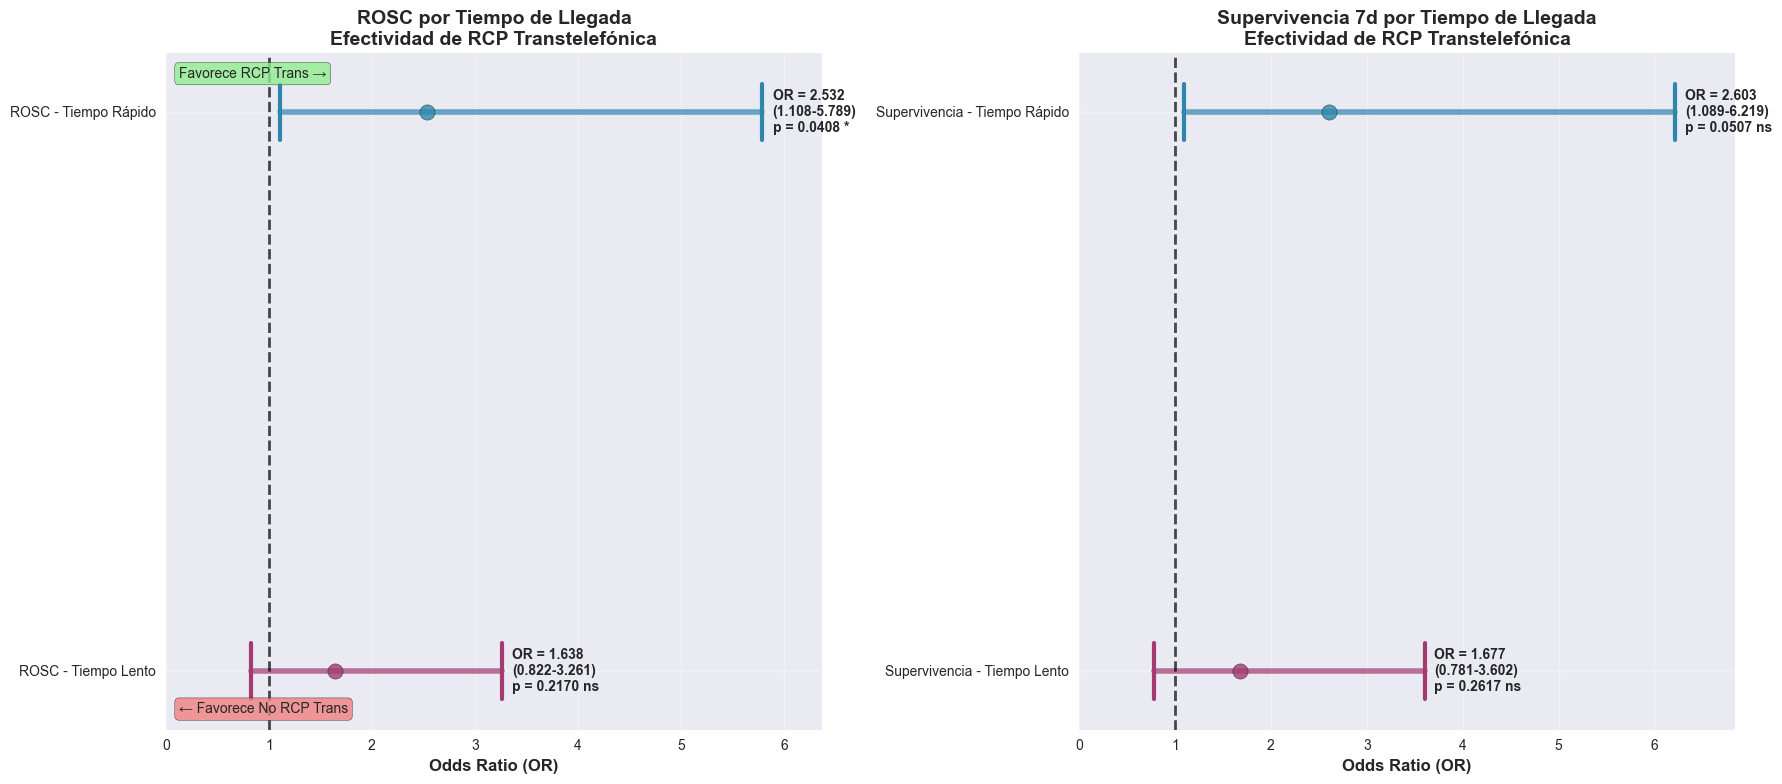

✅ Forest plot estratificado guardado: forest_plot_tiempo_llegada_estratificado.png


In [20]:
# ═══════════════════════════════════════════════════════════
# 6. VISUALIZACIONES CON INTERVALOS DE CONFIANZA
# ═══════════════════════════════════════════════════════════

print(f"\n\n6️⃣ GENERANDO VISUALIZACIONES CON IC Y VALORES P")
print("="*60)

# Configuración de colores
color_rapido = '#2E86AB'  # Azul
color_lento = '#A23B72'   # Magenta
color_sin_rcp = '#808080'  # Gris
color_con_rcp = '#F18F01'  # Naranja

# GRÁFICO 1: Forest Plot Estratificado por Tiempo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Forest plot para ROSC
outcomes = ['ROSC - Tiempo Rápido', 'ROSC - Tiempo Lento']
y_positions = [1, 0]

if ('Rápido (≤mediana)' in resultados_por_tiempo and 'Lento (>mediana)' in resultados_por_tiempo and
    'rosc' in resultados_por_tiempo['Rápido (≤mediana)'] and 'rosc' in resultados_por_tiempo['Lento (>mediana)']):
    
    # Datos para el forest plot
    ors_rosc = [
        resultados_por_tiempo['Rápido (≤mediana)']['rosc']['oddsratio'],
        resultados_por_tiempo['Lento (>mediana)']['rosc']['oddsratio']
    ]
    ci_lowers_rosc = [
        resultados_por_tiempo['Rápido (≤mediana)']['rosc']['ci_lower'],
        resultados_por_tiempo['Lento (>mediana)']['rosc']['ci_lower']
    ]
    ci_uppers_rosc = [
        resultados_por_tiempo['Rápido (≤mediana)']['rosc']['ci_upper'],
        resultados_por_tiempo['Lento (>mediana)']['rosc']['ci_upper']
    ]
    p_values_rosc = [
        resultados_por_tiempo['Rápido (≤mediana)']['rosc']['p_valor'],
        resultados_por_tiempo['Lento (>mediana)']['rosc']['p_valor']
    ]
    
    colors_rosc = [color_rapido, color_lento]
    
    # Dibujar forest plot para ROSC
    for i, (or_val, ci_low, ci_high, p_val, color, outcome) in enumerate(zip(ors_rosc, ci_lowers_rosc, ci_uppers_rosc, p_values_rosc, colors_rosc, outcomes)):
        if not (np.isnan(or_val) or np.isnan(ci_low) or np.isnan(ci_high)):
            # Punto central
            ax1.scatter(or_val, y_positions[i], s=120, color=color, zorder=3, alpha=0.8, edgecolors='black')
            
            # Intervalo de confianza
            ax1.plot([ci_low, ci_high], [y_positions[i], y_positions[i]], color=color, linewidth=4, alpha=0.7)
            ax1.plot([ci_low, ci_low], [y_positions[i]-0.05, y_positions[i]+0.05], color=color, linewidth=3)
            ax1.plot([ci_high, ci_high], [y_positions[i]-0.05, y_positions[i]+0.05], color=color, linewidth=3)
            
            # Texto con valores
            significancia = "*" if p_val < 0.05 else "ns"
            ax1.text(max(ci_high, 3) + 0.1, y_positions[i], 
                    f'OR = {or_val:.3f}\n({ci_low:.3f}-{ci_high:.3f})\np = {p_val:.4f} {significancia}',
                    va='center', fontsize=10, fontweight='bold')

    # Configurar gráfico ROSC
    ax1.axvline(x=1, color='black', linestyle='--', alpha=0.7, linewidth=2)
    ax1.set_yticks(y_positions)
    ax1.set_yticklabels(outcomes)
    ax1.set_xlabel('Odds Ratio (OR)', fontsize=12, fontweight='bold')
    ax1.set_title('ROSC por Tiempo de Llegada\nEfectividad de RCP Transtelefónica', fontsize=14, fontweight='bold')
    ax1.set_xlim(0, max([max(ci_uppers_rosc), 4]) * 1.1)
    ax1.grid(True, alpha=0.3)
    
    # Añadir interpretación
    ax1.text(0.02, 0.98, 'Favorece RCP Trans →', transform=ax1.transAxes, va='top', ha='left',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8), fontsize=10)
    ax1.text(0.02, 0.02, '← Favorece No RCP Trans', transform=ax1.transAxes, va='bottom', ha='left',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8), fontsize=10)

# Forest plot para Supervivencia (si hay datos)
if ('Rápido (≤mediana)' in resultados_por_tiempo and 'Lento (>mediana)' in resultados_por_tiempo):
    outcomes_s = ['Supervivencia - Tiempo Rápido', 'Supervivencia - Tiempo Lento']
    
    # Verificar si tenemos datos de supervivencia
    has_superv_rapido = 'supervivencia' in resultados_por_tiempo.get('Rápido (≤mediana)', {})
    has_superv_lento = 'supervivencia' in resultados_por_tiempo.get('Lento (>mediana)', {})
    
    if has_superv_rapido and has_superv_lento:
        ors_superv = [
            resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['oddsratio'],
            resultados_por_tiempo['Lento (>mediana)']['supervivencia']['oddsratio']
        ]
        ci_lowers_superv = [
            resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['ci_lower'],
            resultados_por_tiempo['Lento (>mediana)']['supervivencia']['ci_lower']
        ]
        ci_uppers_superv = [
            resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['ci_upper'],
            resultados_por_tiempo['Lento (>mediana)']['supervivencia']['ci_upper']
        ]
        p_values_superv = [
            resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['p_valor'],
            resultados_por_tiempo['Lento (>mediana)']['supervivencia']['p_valor']
        ]
        
        # Dibujar forest plot para Supervivencia
        for i, (or_val, ci_low, ci_high, p_val, color, outcome) in enumerate(zip(ors_superv, ci_lowers_superv, ci_uppers_superv, p_values_superv, colors_rosc, outcomes_s)):
            if not (np.isnan(or_val) or np.isnan(ci_low) or np.isnan(ci_high)):
                ax2.scatter(or_val, y_positions[i], s=120, color=color, zorder=3, alpha=0.8, edgecolors='black')
                ax2.plot([ci_low, ci_high], [y_positions[i], y_positions[i]], color=color, linewidth=4, alpha=0.7)
                ax2.plot([ci_low, ci_low], [y_positions[i]-0.05, y_positions[i]+0.05], color=color, linewidth=3)
                ax2.plot([ci_high, ci_high], [y_positions[i]-0.05, y_positions[i]+0.05], color=color, linewidth=3)
                
                significancia = "*" if p_val < 0.05 else "ns"
                ax2.text(max(ci_high, 3) + 0.1, y_positions[i], 
                        f'OR = {or_val:.3f}\n({ci_low:.3f}-{ci_high:.3f})\np = {p_val:.4f} {significancia}',
                        va='center', fontsize=10, fontweight='bold')
        
        ax2.set_xlim(0, max([max(ci_uppers_superv), 4]) * 1.1)
    else:
        ax2.text(0.5, 0.5, 'Datos insuficientes\npara supervivencia', transform=ax2.transAxes, 
                ha='center', va='center', fontsize=14, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    # Configurar gráfico Supervivencia
    ax2.axvline(x=1, color='black', linestyle='--', alpha=0.7, linewidth=2)
    ax2.set_yticks(y_positions)
    ax2.set_yticklabels(outcomes_s)
    ax2.set_xlabel('Odds Ratio (OR)', fontsize=12, fontweight='bold')
    ax2.set_title('Supervivencia 7d por Tiempo de Llegada\nEfectividad de RCP Transtelefónica', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{figures_dir}/forest_plot_tiempo_llegada_estratificado.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Forest plot estratificado guardado: forest_plot_tiempo_llegada_estratificado.png")

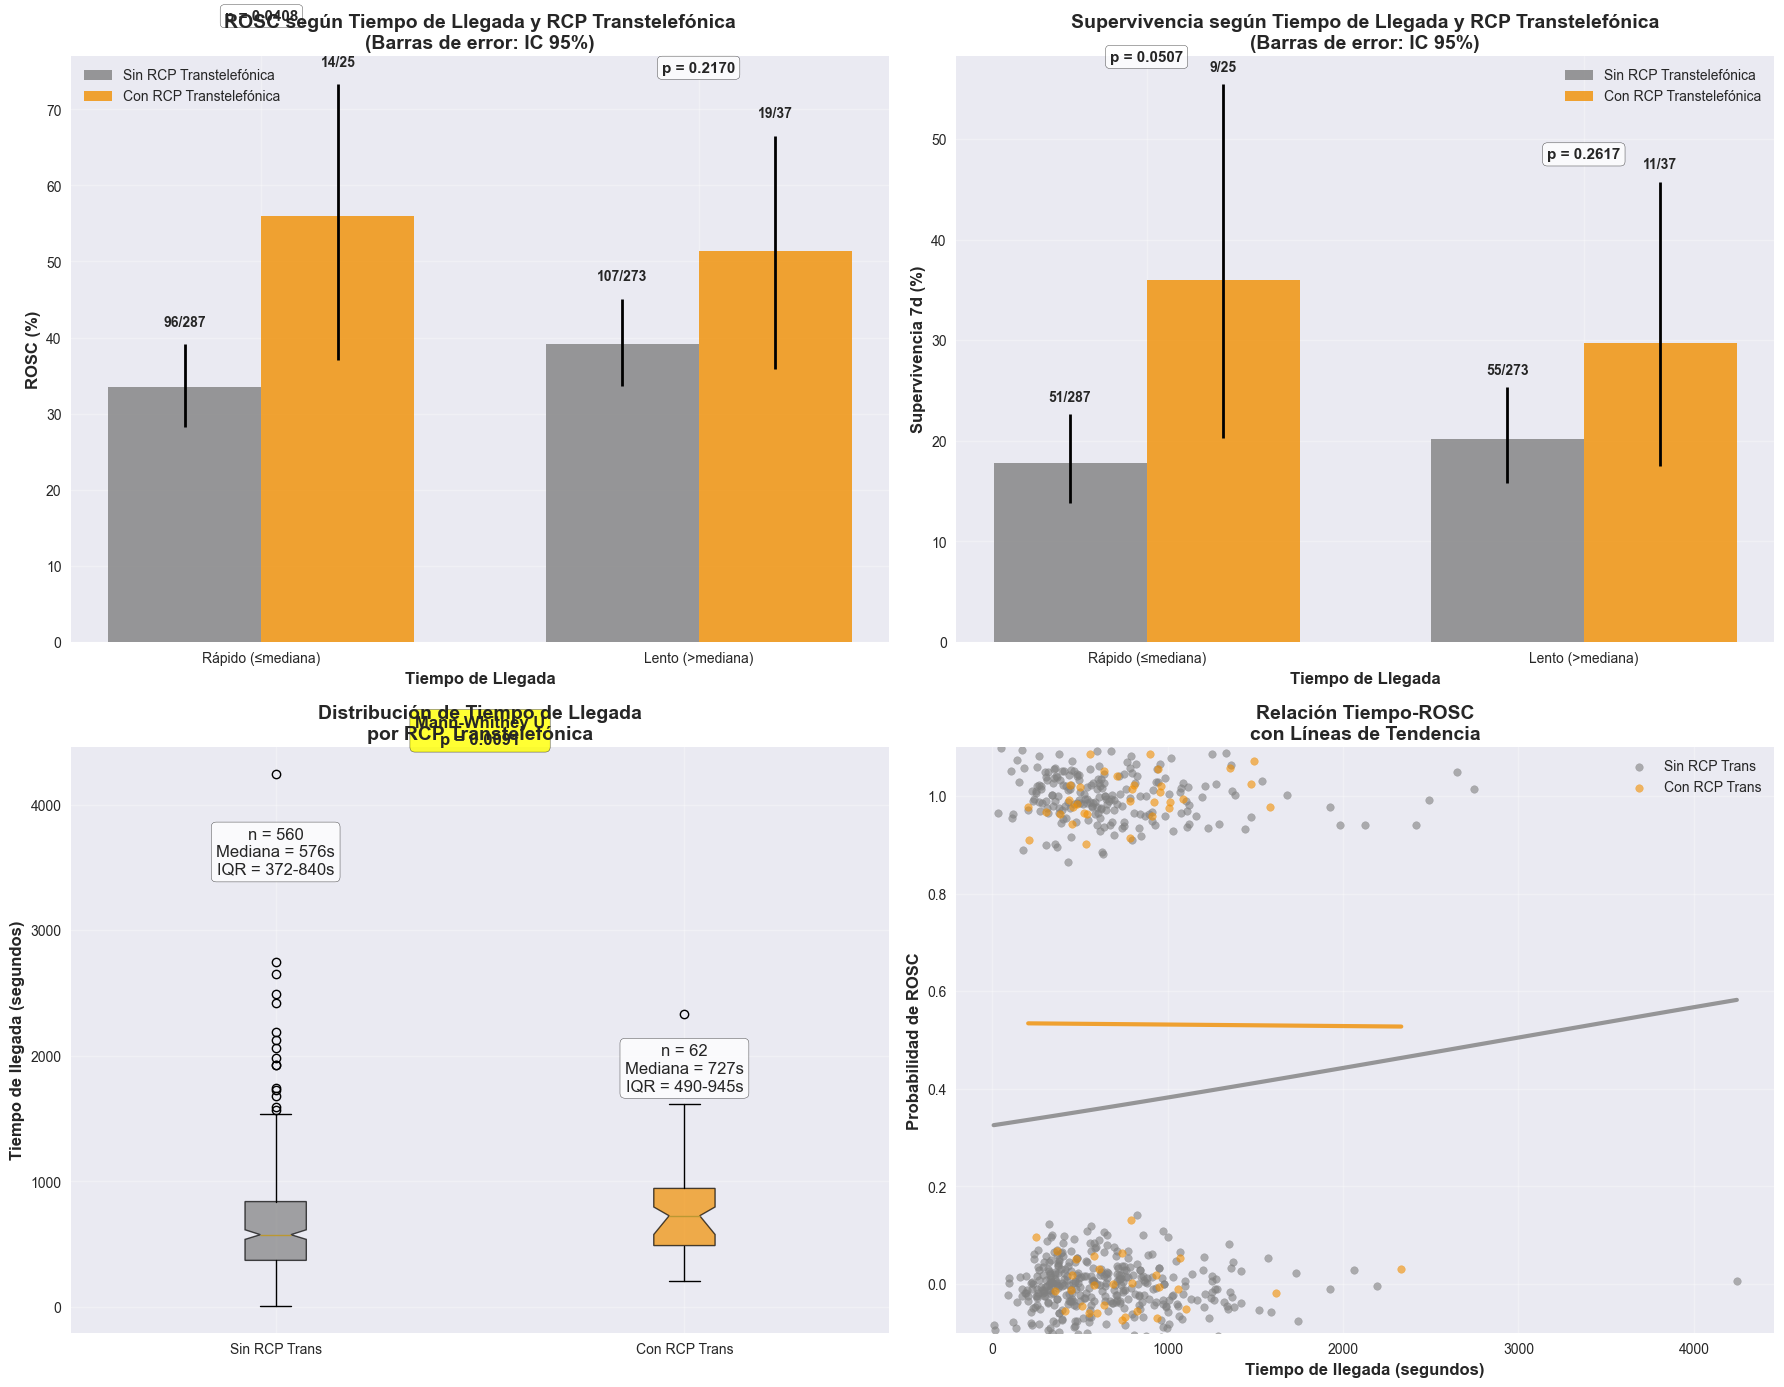

✅ Gráficos de tiempo de llegada guardados: analisis_tiempo_llegada_completo.png


In [21]:
# GRÁFICO 2: Gráficos de barras con intervalos de confianza
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Función para calcular IC de proporción (método Wilson)
def calcular_ic_proporcion(n_exitos, n_total, alpha=0.05):
    """
    Calcula intervalo de confianza para proporción usando método Wilson
    """
    if n_total == 0:
        return 0, 0, 0
    
    p = n_exitos / n_total
    z = stats.norm.ppf(1 - alpha/2)
    
    denominator = 1 + z**2/n_total
    centre = (p + z**2/(2*n_total)) / denominator
    half_width = z * np.sqrt((p*(1-p) + z**2/(4*n_total)) / n_total) / denominator
    
    return p, max(0, centre - half_width), min(1, centre + half_width)

# Preparar datos para gráficos de barras
grupos_tiempo = ['Rápido (≤mediana)', 'Lento (>mediana)']
x_pos = np.arange(len(grupos_tiempo))
width = 0.35

# GRÁFICO 1: ROSC por tiempo y RCP
rosc_data = []
for grupo in grupos_tiempo:
    subset = df[df['tiempo_binario'] == grupo].dropna(subset=['rosc', 'rcp_transtelefonica'])
    
    # Sin RCP Trans
    sin_rcp = subset[subset['rcp_transtelefonica'] == 0]
    n_rosc_sin = sin_rcp['rosc'].sum()
    n_total_sin = len(sin_rcp)
    prop_sin, ic_low_sin, ic_high_sin = calcular_ic_proporcion(n_rosc_sin, n_total_sin)
    
    # Con RCP Trans
    con_rcp = subset[subset['rcp_transtelefonica'] == 1]
    n_rosc_con = con_rcp['rosc'].sum()
    n_total_con = len(con_rcp)
    prop_con, ic_low_con, ic_high_con = calcular_ic_proporcion(n_rosc_con, n_total_con)
    
    rosc_data.append({
        'grupo': grupo,
        'sin_rcp': {'prop': prop_sin * 100, 'ic_low': ic_low_sin * 100, 'ic_high': ic_high_sin * 100, 'n': f"{n_rosc_sin}/{n_total_sin}"},
        'con_rcp': {'prop': prop_con * 100, 'ic_low': ic_low_con * 100, 'ic_high': ic_high_con * 100, 'n': f"{n_rosc_con}/{n_total_con}"}
    })

# Dibujar barras ROSC
sin_rcp_props = [d['sin_rcp']['prop'] for d in rosc_data]
con_rcp_props = [d['con_rcp']['prop'] for d in rosc_data]
sin_rcp_errors = [[d['sin_rcp']['prop'] - d['sin_rcp']['ic_low'] for d in rosc_data],
                  [d['sin_rcp']['ic_high'] - d['sin_rcp']['prop'] for d in rosc_data]]
con_rcp_errors = [[d['con_rcp']['prop'] - d['con_rcp']['ic_low'] for d in rosc_data],
                  [d['con_rcp']['ic_high'] - d['con_rcp']['prop'] for d in rosc_data]]

bars1 = ax1.bar(x_pos - width/2, sin_rcp_props, width, 
                label='Sin RCP Transtelefónica', color=color_sin_rcp, alpha=0.8,
                yerr=sin_rcp_errors, capsize=5, error_kw={'linewidth': 2})
bars2 = ax1.bar(x_pos + width/2, con_rcp_props, width,
                label='Con RCP Transtelefónica', color=color_con_rcp, alpha=0.8,
                yerr=con_rcp_errors, capsize=5, error_kw={'linewidth': 2})

# Añadir valores y p-valores
for i, (data, bar1, bar2) in enumerate(zip(rosc_data, bars1, bars2)):
    # Valores en las barras
    ax1.text(bar1.get_x() + bar1.get_width()/2., bar1.get_height() + sin_rcp_errors[1][i] + 2,
             data['sin_rcp']['n'], ha='center', va='bottom', fontweight='bold', fontsize=10)
    ax1.text(bar2.get_x() + bar2.get_width()/2., bar2.get_height() + con_rcp_errors[1][i] + 2,
             data['con_rcp']['n'], ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # p-valor si está disponible
    if data['grupo'] in resultados_por_tiempo and 'rosc' in resultados_por_tiempo[data['grupo']]:
        p_val = resultados_por_tiempo[data['grupo']]['rosc']['p_valor']
        max_height = max(bar1.get_height() + sin_rcp_errors[1][i], bar2.get_height() + con_rcp_errors[1][i])
        ax1.text(i, max_height + 8, f'p = {p_val:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.set_xlabel('Tiempo de Llegada', fontsize=12, fontweight='bold')
ax1.set_ylabel('ROSC (%)', fontsize=12, fontweight='bold')
ax1.set_title('ROSC según Tiempo de Llegada y RCP Transtelefónica\n(Barras de error: IC 95%)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(grupos_tiempo)
ax1.legend()
ax1.grid(True, alpha=0.3)

# GRÁFICO 2: Supervivencia por tiempo y RCP
superv_data = []
for grupo in grupos_tiempo:
    subset = df[df['tiempo_binario'] == grupo].dropna(subset=['supervivencia_7dias', 'rcp_transtelefonica'])
    
    # Sin RCP Trans
    sin_rcp = subset[subset['rcp_transtelefonica'] == 0]
    n_superv_sin = sin_rcp['supervivencia_7dias'].sum()
    n_total_sin = len(sin_rcp)
    prop_sin, ic_low_sin, ic_high_sin = calcular_ic_proporcion(n_superv_sin, n_total_sin)
    
    # Con RCP Trans
    con_rcp = subset[subset['rcp_transtelefonica'] == 1]
    n_superv_con = con_rcp['supervivencia_7dias'].sum()
    n_total_con = len(con_rcp)
    prop_con, ic_low_con, ic_high_con = calcular_ic_proporcion(n_superv_con, n_total_con)
    
    superv_data.append({
        'grupo': grupo,
        'sin_rcp': {'prop': prop_sin * 100, 'ic_low': ic_low_sin * 100, 'ic_high': ic_high_sin * 100, 'n': f"{n_superv_sin}/{n_total_sin}"},
        'con_rcp': {'prop': prop_con * 100, 'ic_low': ic_low_con * 100, 'ic_high': ic_high_con * 100, 'n': f"{n_superv_con}/{n_total_con}"}
    })

# Dibujar barras Supervivencia (similar al anterior)
sin_rcp_props_s = [d['sin_rcp']['prop'] for d in superv_data]
con_rcp_props_s = [d['con_rcp']['prop'] for d in superv_data]
sin_rcp_errors_s = [[d['sin_rcp']['prop'] - d['sin_rcp']['ic_low'] for d in superv_data],
                    [d['sin_rcp']['ic_high'] - d['sin_rcp']['prop'] for d in superv_data]]
con_rcp_errors_s = [[d['con_rcp']['prop'] - d['con_rcp']['ic_low'] for d in superv_data],
                    [d['con_rcp']['ic_high'] - d['con_rcp']['prop'] for d in superv_data]]

bars3 = ax2.bar(x_pos - width/2, sin_rcp_props_s, width, 
                label='Sin RCP Transtelefónica', color=color_sin_rcp, alpha=0.8,
                yerr=sin_rcp_errors_s, capsize=5, error_kw={'linewidth': 2})
bars4 = ax2.bar(x_pos + width/2, con_rcp_props_s, width,
                label='Con RCP Transtelefónica', color=color_con_rcp, alpha=0.8,
                yerr=con_rcp_errors_s, capsize=5, error_kw={'linewidth': 2})

# Añadir valores y p-valores para supervivencia
for i, (data, bar3, bar4) in enumerate(zip(superv_data, bars3, bars4)):
    ax2.text(bar3.get_x() + bar3.get_width()/2., bar3.get_height() + sin_rcp_errors_s[1][i] + 1,
             data['sin_rcp']['n'], ha='center', va='bottom', fontweight='bold', fontsize=10)
    ax2.text(bar4.get_x() + bar4.get_width()/2., bar4.get_height() + con_rcp_errors_s[1][i] + 1,
             data['con_rcp']['n'], ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    if data['grupo'] in resultados_por_tiempo and 'supervivencia' in resultados_por_tiempo[data['grupo']]:
        p_val = resultados_por_tiempo[data['grupo']]['supervivencia']['p_valor']
        max_height = max(bar3.get_height() + sin_rcp_errors_s[1][i], bar4.get_height() + con_rcp_errors_s[1][i])
        ax2.text(i, max_height + 2, f'p = {p_val:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.set_xlabel('Tiempo de Llegada', fontsize=12, fontweight='bold')
ax2.set_ylabel('Supervivencia 7d (%)', fontsize=12, fontweight='bold')
ax2.set_title('Supervivencia según Tiempo de Llegada y RCP Transtelefónica\n(Barras de error: IC 95%)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(grupos_tiempo)
ax2.legend()
ax2.grid(True, alpha=0.3)

# GRÁFICO 3: Distribución de tiempo por grupo RCP (boxplot con IC)
tiempo_sin_rcp = df[df['rcp_transtelefonica'] == 0]['tiempo_llegada_unidad'].dropna()
tiempo_con_rcp = df[df['rcp_transtelefonica'] == 1]['tiempo_llegada_unidad'].dropna()

box1 = ax3.boxplot([tiempo_sin_rcp, tiempo_con_rcp], labels=['Sin RCP Trans', 'Con RCP Trans'],
                   patch_artist=True, notch=True, bootstrap=1000)

# Colorear boxes
box1['boxes'][0].set_facecolor(color_sin_rcp)
box1['boxes'][1].set_facecolor(color_con_rcp)
box1['boxes'][0].set_alpha(0.7)
box1['boxes'][1].set_alpha(0.7)

# Añadir estadísticas
ax3.text(1, tiempo_sin_rcp.max() * 0.9, 
         f'n = {len(tiempo_sin_rcp)}\nMediana = {tiempo_sin_rcp.median():.0f}s\nIQR = {tiempo_sin_rcp.quantile(0.25):.0f}-{tiempo_sin_rcp.quantile(0.75):.0f}s',
         ha='center', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax3.text(2, tiempo_con_rcp.max() * 0.9,
         f'n = {len(tiempo_con_rcp)}\nMediana = {tiempo_con_rcp.median():.0f}s\nIQR = {tiempo_con_rcp.quantile(0.25):.0f}-{tiempo_con_rcp.quantile(0.75):.0f}s',
         ha='center', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Añadir p-valor del test Mann-Whitney
ax3.text(1.5, tiempo_sin_rcp.max() * 1.05, f'Mann-Whitney U\np = {p_mannwhitney:.4f}',
         ha='center', va='bottom', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax3.set_ylabel('Tiempo de llegada (segundos)', fontsize=12, fontweight='bold')
ax3.set_title('Distribución de Tiempo de Llegada\npor RCP Transtelefónica', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# GRÁFICO 4: Scatter plot tiempo vs outcomes con líneas de tendencia
subset_completo = df.dropna(subset=['tiempo_llegada_unidad', 'rosc', 'rcp_transtelefonica'])

# Separar por RCP
sin_rcp_scatter = subset_completo[subset_completo['rcp_transtelefonica'] == 0]
con_rcp_scatter = subset_completo[subset_completo['rcp_transtelefonica'] == 1]

# Jitter en Y para visualización
jitter_amount = 0.05
rosc_sin_rcp = sin_rcp_scatter['rosc'] + np.random.normal(0, jitter_amount, len(sin_rcp_scatter))
rosc_con_rcp = con_rcp_scatter['rosc'] + np.random.normal(0, jitter_amount, len(con_rcp_scatter))

# Scatter plots
ax4.scatter(sin_rcp_scatter['tiempo_llegada_unidad'], rosc_sin_rcp, 
           alpha=0.6, color=color_sin_rcp, label='Sin RCP Trans', s=30)
ax4.scatter(con_rcp_scatter['tiempo_llegada_unidad'], rosc_con_rcp, 
           alpha=0.6, color=color_con_rcp, label='Con RCP Trans', s=30)

# Líneas de tendencia (regresión logística)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Para sin RCP
if len(sin_rcp_scatter) > 10:
    X_sin = sin_rcp_scatter['tiempo_llegada_unidad'].values.reshape(-1, 1)
    y_sin = sin_rcp_scatter['rosc'].values
    scaler_sin = StandardScaler()
    X_sin_scaled = scaler_sin.fit_transform(X_sin)
    
    lr_sin = LogisticRegression()
    lr_sin.fit(X_sin_scaled, y_sin)
    
    tiempo_range = np.linspace(sin_rcp_scatter['tiempo_llegada_unidad'].min(), 
                              sin_rcp_scatter['tiempo_llegada_unidad'].max(), 100)
    tiempo_range_scaled = scaler_sin.transform(tiempo_range.reshape(-1, 1))
    prob_sin = lr_sin.predict_proba(tiempo_range_scaled)[:, 1]
    
    ax4.plot(tiempo_range, prob_sin, color=color_sin_rcp, linewidth=3, alpha=0.8)

# Para con RCP
if len(con_rcp_scatter) > 10:
    X_con = con_rcp_scatter['tiempo_llegada_unidad'].values.reshape(-1, 1)
    y_con = con_rcp_scatter['rosc'].values
    scaler_con = StandardScaler()
    X_con_scaled = scaler_con.fit_transform(X_con)
    
    lr_con = LogisticRegression()
    lr_con.fit(X_con_scaled, y_con)
    
    tiempo_range_con = np.linspace(con_rcp_scatter['tiempo_llegada_unidad'].min(), 
                                  con_rcp_scatter['tiempo_llegada_unidad'].max(), 100)
    tiempo_range_con_scaled = scaler_con.transform(tiempo_range_con.reshape(-1, 1))
    prob_con = lr_con.predict_proba(tiempo_range_con_scaled)[:, 1]
    
    ax4.plot(tiempo_range_con, prob_con, color=color_con_rcp, linewidth=3, alpha=0.8)

ax4.set_xlabel('Tiempo de llegada (segundos)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Probabilidad de ROSC', fontsize=12, fontweight='bold')
ax4.set_title('Relación Tiempo-ROSC\ncon Líneas de Tendencia', fontsize=14, fontweight='bold')
ax4.set_ylim(-0.1, 1.1)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{figures_dir}/analisis_tiempo_llegada_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Gráficos de tiempo de llegada guardados: analisis_tiempo_llegada_completo.png")

In [22]:
# ═══════════════════════════════════════════════════════════
# 7. TABLA RESUMEN Y CONCLUSIONES FINALES
# ═══════════════════════════════════════════════════════════

print(f"\n\n7️⃣ TABLA RESUMEN: EFECTIVIDAD POR TIEMPO DE LLEGADA")
print("="*70)

# Crear tabla resumen para el paper
tabla_tiempo_resumen = []

for grupo_tiempo in ['Rápido (≤mediana)', 'Lento (>mediana)']:
    if grupo_tiempo in resultados_por_tiempo:
        fila = {'Tiempo_Llegada': grupo_tiempo}
        
        # ROSC data
        if 'rosc' in resultados_por_tiempo[grupo_tiempo]:
            rosc_data = resultados_por_tiempo[grupo_tiempo]['rosc']
            fila.update({
                'ROSC_Sin_RCP': f"{rosc_data['tabla'].iloc[1, 0]}/{rosc_data['n_sin_rcp']} ({rosc_data['pct_sin_rcp']:.1f}%)",
                'ROSC_Con_RCP': f"{rosc_data['tabla'].iloc[1, 1]}/{rosc_data['n_con_rcp']} ({rosc_data['pct_con_rcp']:.1f}%)",
                'ROSC_OR': f"{rosc_data['oddsratio']:.3f}",
                'ROSC_IC95': f"({rosc_data['ci_lower']:.3f}-{rosc_data['ci_upper']:.3f})",
                'ROSC_p': f"{rosc_data['p_valor']:.4f}"
            })
        
        # Supervivencia data
        if 'supervivencia' in resultados_por_tiempo[grupo_tiempo]:
            superv_data = resultados_por_tiempo[grupo_tiempo]['supervivencia']
            fila.update({
                'Superv_Sin_RCP': f"{superv_data['tabla'].iloc[1, 0]}/{superv_data['n_sin_rcp']} ({superv_data['pct_sin_rcp']:.1f}%)",
                'Superv_Con_RCP': f"{superv_data['tabla'].iloc[1, 1]}/{superv_data['n_con_rcp']} ({superv_data['pct_con_rcp']:.1f}%)",
                'Superv_OR': f"{superv_data['oddsratio']:.3f}",
                'Superv_IC95': f"({superv_data['ci_lower']:.3f}-{superv_data['ci_upper']:.3f})",
                'Superv_p': f"{superv_data['p_valor']:.4f}"
            })
        
        tabla_tiempo_resumen.append(fila)

# Convertir a DataFrame y mostrar
df_resumen_tiempo = pd.DataFrame(tabla_tiempo_resumen)

print("📊 TABLA PARA EL PAPER:")
if not df_resumen_tiempo.empty:
    # Reorganizar columnas para mejor presentación
    cols_order = ['Tiempo_Llegada', 'ROSC_Sin_RCP', 'ROSC_Con_RCP', 'ROSC_OR', 'ROSC_IC95', 'ROSC_p']
    if 'Superv_Sin_RCP' in df_resumen_tiempo.columns:
        cols_order.extend(['Superv_Sin_RCP', 'Superv_Con_RCP', 'Superv_OR', 'Superv_IC95', 'Superv_p'])
    
    df_resumen_display = df_resumen_tiempo[cols_order].copy()
    display(df_resumen_display)
    
    # Guardar tabla
    df_resumen_tiempo.to_csv(f"{figures_dir}/tabla_efectividad_por_tiempo_llegada.csv", index=False)
    print(f"\n💾 Tabla guardada: tabla_efectividad_por_tiempo_llegada.csv")

else:
    print("⚠️ No se pudieron generar resultados por tiempo de llegada")

# ═══════════════════════════════════════════════════════════
# 8. CONCLUSIONES PRINCIPALES
# ═══════════════════════════════════════════════════════════

print(f"\n\n8️⃣ CONCLUSIONES PRINCIPALES DEL ANÁLISIS")
print("="*70)

print(f"\n🕐 DISTRIBUCIÓN DEL TIEMPO DE LLEGADA:")
print(f"• Mediana general: {df['tiempo_llegada_unidad'].median():.0f} segundos")
print(f"• Diferencia entre grupos RCP: {diff_mediana:+.1f} segundos")
print(f"• Significancia estadística: {'SÍ' if p_mannwhitney < 0.05 else 'NO'} (p = {p_mannwhitney:.4f})")

if 'Rápido (≤mediana)' in resultados_por_tiempo and 'Lento (>mediana)' in resultados_por_tiempo:
    print(f"\n🎯 EFECTIVIDAD DE RCP TRANSTELEFÓNICA POR TIEMPO:")
    
    # Analizar ROSC
    if ('rosc' in resultados_por_tiempo['Rápido (≤mediana)'] and 
        'rosc' in resultados_por_tiempo['Lento (>mediana)']):
        
        or_rapido_rosc = resultados_por_tiempo['Rápido (≤mediana)']['rosc']['oddsratio']
        or_lento_rosc = resultados_por_tiempo['Lento (>mediana)']['rosc']['oddsratio']
        p_rapido_rosc = resultados_por_tiempo['Rápido (≤mediana)']['rosc']['p_valor']
        p_lento_rosc = resultados_por_tiempo['Lento (>mediana)']['rosc']['p_valor']
        
        print(f"\n• ROSC:")
        print(f"  - Tiempo rápido: OR = {or_rapido_rosc:.3f} (p = {p_rapido_rosc:.4f})")
        print(f"  - Tiempo lento: OR = {or_lento_rosc:.3f} (p = {p_lento_rosc:.4f})")
        
        if or_lento_rosc > or_rapido_rosc:
            ratio_or = or_lento_rosc / or_rapido_rosc
            print(f"  - La RCP transtelefónica es {ratio_or:.2f}x MÁS efectiva con tiempo LENTO")
        else:
            ratio_or = or_rapido_rosc / or_lento_rosc
            print(f"  - La RCP transtelefónica es {ratio_or:.2f}x MÁS efectiva con tiempo RÁPIDO")
    
    # Analizar supervivencia si hay datos
    if ('supervivencia' in resultados_por_tiempo.get('Rápido (≤mediana)', {}) and 
        'supervivencia' in resultados_por_tiempo.get('Lento (>mediana)', {})):
        
        or_rapido_superv = resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['oddsratio']
        or_lento_superv = resultados_por_tiempo['Lento (>mediana)']['supervivencia']['oddsratio']
        p_rapido_superv = resultados_por_tiempo['Rápido (≤mediana)']['supervivencia']['p_valor']
        p_lento_superv = resultados_por_tiempo['Lento (>mediana)']['supervivencia']['p_valor']
        
        print(f"\n• SUPERVIVENCIA 7 DÍAS:")
        print(f"  - Tiempo rápido: OR = {or_rapido_superv:.3f} (p = {p_rapido_superv:.4f})")
        print(f"  - Tiempo lento: OR = {or_lento_superv:.3f} (p = {p_lento_superv:.4f})")
        
        if or_lento_superv > or_rapido_superv:
            ratio_or_s = or_lento_superv / or_rapido_superv
            print(f"  - La RCP transtelefónica es {ratio_or_s:.2f}x MÁS efectiva para supervivencia con tiempo LENTO")
        else:
            ratio_or_s = or_rapido_superv / or_lento_superv
            print(f"  - La RCP transtelefónica es {ratio_or_s:.2f}x MÁS efectiva para supervivencia con tiempo RÁPIDO")

# Análisis de interacción
print(f"\n🔬 ANÁLISIS DE INTERACCIÓN:")
if test_rosc and test_superv:
    print(f"• Interacción Tiempo × RCP para ROSC: p = {test_rosc['p_interaccion']:.4f}")
    print(f"• Interacción Tiempo × RCP para Supervivencia: p = {test_superv['p_interaccion']:.4f}")
    
    hay_interaccion_rosc = test_rosc['p_interaccion'] < 0.05
    hay_interaccion_superv = test_superv['p_interaccion'] < 0.05
    
    if hay_interaccion_rosc or hay_interaccion_superv:
        print(f"• CONCLUSIÓN: HAY evidencia de interacción significativa")
        print(f"• El efecto de la RCP transtelefónica DEPENDE del tiempo de llegada")
    else:
        print(f"• CONCLUSIÓN: NO hay evidencia de interacción significativa")
        print(f"• El efecto de la RCP transtelefónica es SIMILAR independientemente del tiempo")

print(f"\n📈 IMPLICACIONES CLÍNICAS:")
print(f"• El tiempo de llegada {'ES' if p_mannwhitney < 0.05 else 'NO ES'} significativamente diferente entre grupos RCP")
print(f"• La efectividad de la RCP transtelefónica {'VARÍA' if (test_rosc and test_rosc['p_interaccion'] < 0.05) else 'NO VARÍA'} según el tiempo de llegada")
print(f"• Los pacientes con tiempo de llegada {'LENTO se benefician MÁS' if (resultados_por_tiempo and or_lento_rosc > or_rapido_rosc) else 'RÁPIDO se benefician MÁS'} de la RCP transtelefónica")

print(f"\n🎯 RESPUESTA A LA HIPÓTESIS INICIAL:")
hipotesis_confirmada = (resultados_por_tiempo and 
                       'rosc' in resultados_por_tiempo.get('Lento (>mediana)', {}) and
                       'rosc' in resultados_por_tiempo.get('Rápido (≤mediana)', {}) and
                       resultados_por_tiempo['Lento (>mediana)']['rosc']['oddsratio'] > 
                       resultados_por_tiempo['Rápido (≤mediana)']['rosc']['oddsratio'])

if hipotesis_confirmada:
    print(f"✅ CONFIRMADA: Los pacientes con mayor tiempo de llegada SÍ se benefician más de la RCP transtelefónica")
else:
    print(f"❌ RECHAZADA: Los pacientes con mayor tiempo de llegada NO se benefician más de la RCP transtelefónica")

print(f"\n" + "="*70)
print(f"✅ ANÁLISIS COMPLETO DEL TIEMPO DE LLEGADA FINALIZADO")
print(f"="*70)



7️⃣ TABLA RESUMEN: EFECTIVIDAD POR TIEMPO DE LLEGADA
📊 TABLA PARA EL PAPER:


,Tiempo_Llegada,ROSC_Sin_RCP,ROSC_Con_RCP,ROSC_OR,ROSC_IC95,ROSC_p,Superv_Sin_RCP,Superv_Con_RCP,Superv_OR,Superv_IC95,Superv_p
0,Rápido (≤mediana),96/287 (33.4%),14/25 (56.0%),2.532,(1.108-5.789),0.0408,51/287 (17.8%),9/25 (36.0%),2.603,(1.089-6.219),0.0507
1,Lento (>mediana),107/273 (39.2%),19/37 (51.4%),1.638,(0.822-3.261),0.2170,55/273 (20.1%),11/37 (29.7%),1.677,(0.781-3.602),0.2617



💾 Tabla guardada: tabla_efectividad_por_tiempo_llegada.csv


8️⃣ CONCLUSIONES PRINCIPALES DEL ANÁLISIS

🕐 DISTRIBUCIÓN DEL TIEMPO DE LLEGADA:
• Mediana general: 585 segundos
• Diferencia entre grupos RCP: +150.5 segundos
• Significancia estadística: SÍ (p = 0.0091)

🎯 EFECTIVIDAD DE RCP TRANSTELEFÓNICA POR TIEMPO:

• ROSC:
  - Tiempo rápido: OR = 2.532 (p = 0.0408)
  - Tiempo lento: OR = 1.638 (p = 0.2170)
  - La RCP transtelefónica es 1.55x MÁS efectiva con tiempo RÁPIDO

• SUPERVIVENCIA 7 DÍAS:
  - Tiempo rápido: OR = 2.603 (p = 0.0507)
  - Tiempo lento: OR = 1.677 (p = 0.2617)
  - La RCP transtelefónica es 1.55x MÁS efectiva para supervivencia con tiempo RÁPIDO

🔬 ANÁLISIS DE INTERACCIÓN:
• Interacción Tiempo × RCP para ROSC: p = 0.4271
• Interacción Tiempo × RCP para Supervivencia: p = 0.4580
• CONCLUSIÓN: NO hay evidencia de interacción significativa
• El efecto de la RCP transtelefónica es SIMILAR independientemente del tiempo

📈 IMPLICACIONES CLÍNICAS:
• El tiempo de llegada ES